# Python Auditory Processing Project

### Inspired by a tutorial work by Prof. Martin Cooke, Univ. of the Basque Country

In [1]:
%matplotlib inline

In [2]:
# These are packages that we are going to use in this project
#import importlib                    # allow re-import during development of module; not needed here
import matplotlib.pyplot as plt     # plotting stuff
import numpy as np                  # numerical library - lots of useful stuff
import math                         # generic math library
import auditory as aud              # import the Python Auditory Package (PAP)
from IPython.display import Audio   # for playing sounds

# Aims
* hands-on exploration of some basic auditory concepts
  * auditory frequency resolution and its effects on F0 and formants
* gentle introduction to Python
* introduction to Markdown and notebooks
----

## Introduction to basic syntax and operations

Python has similar syntax to MATLAB. If you know MATLAB, Python is easy to learn - if you do not know MATLAB, Python is even easier because you won't get confused between the two! :D  <br><br> Let's start with some basic stuff. Execute the following famous :) code by selecting the cell below and pressing Shift+Enter. <br> <br>
The output will show up right below the code.

In [3]:
test = "hello world"
print("First text ever:" + test)

First text ever:hello world


You can easily do a lot of stuff with strings:

In [4]:
print(test.capitalize())  # Capitalize a string; prints "Hello world"
print(test.upper())       # Convert a string to uppercase; prints "HELLO WORLD"
print(test.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o wor(ell)d"
print('  new world     '.strip())  # Strip leading and trailing whitespace; prints "new world"

Hello world
HELLO WORLD
he(ell)(ell)o wor(ell)d
new world


Let's go now to some math. Do the same for the following code.

In [5]:
x = np.array([1, 2, 3])
print(x)
print(np.exp(x))
print(np.power(x,2))
print(x+3)

[1 2 3]
[ 2.71828183  7.3890561  20.08553692]
[1 4 9]
[4 5 6]


Make sure the above commands make sense to you. Let's move on.

In [6]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.eye(2)         # Create a 2x2 identity matrix
print(c)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

d = np.random.random((2,2))  # Create a 2x2 array filled with random values
print(d)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"
                             # or something similar...

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[1. 0.]
 [0. 1.]]
[[0.45174089 0.58534458]
 [0.71078485 0.55434735]]


Indexing is easy in Python

In [7]:
nums = list(range(10))     # range is a built-in function that creates a list of integers

print(nums)               # Prints "[0, 1, 2, 3, 4]"

print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"

print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"

print(nums[:7])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"

print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"

print(nums[-5:])          # Slice indices can be negative; prints "[0, 1, 2, 3]"

#nums[2:4] = [10, 11]      # Assign a new sublist to a slice

#print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 3]
[2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


Some more... please make sure you understand what each line does. Feel free to comment out lines in your attempt to fully understand.

In [8]:
xs = [3, 1, 8]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"

print(xs[-1])     # Negative indices count from the end of the list; prints "8"

xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"

xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"

x = xs.pop()      # Remove and return the last element of the list
print(x)
print(xs)      # Prints "bar [3, 1, 'foo']"

[3, 1, 8] 8
8
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar
[3, 1, 'foo']


## Broadcasting 
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [9]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x
print(x)
print(v)
print(y)

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[1 0 1]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix x is equivalent to forming a matrix vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:

In [10]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [11]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


## Plotting

Let's see how plotting works. Consider a simple sinusoid, starting from 0 up to 50, equally sampled using 200 samples.

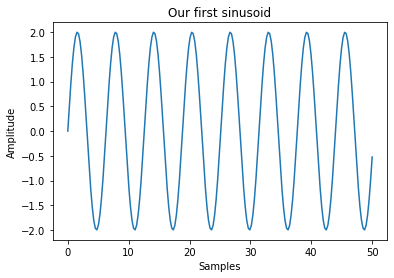

In [12]:
x = np.linspace(0, 50, 200)
y = 2*np.sin(x)
plt.plot(x,y)
plt.title('Our first sinusoid');
plt.xlabel('Samples');
plt.ylabel('Amplitude');

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

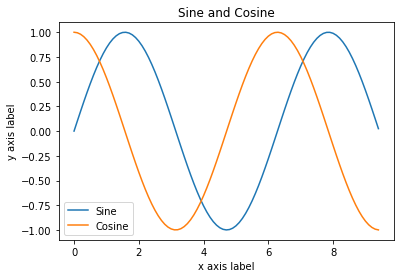

In [13]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

## Loops

Some typical loop introduction...

In [14]:
animals_list = ['cat', 'dog', 'monkey']
for i in animals_list:
    print(i)

cat
dog
monkey


In [15]:
animals_list = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals_list):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: cat", "#2: dog", "#3: monkey", each on its own line

#1: cat
#2: dog
#3: monkey


## Functions

Finally, see how easily one can define a function in Python:

In [16]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print([x, sign(x)])

[-1, 'negative']
[0, 'zero']
[1, 'positive']


## Exercise: Write a function that computes all prime numbers from 1 to 100.
You are allowed to search the numpy package for simple but useful functions, if necessary. Of course, do NOT use another function that performs the task by itself - you have to write your OWN code for this task.

In [17]:
# You should get 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, ...

def print_primes(upperbound):
    print(", ".join([str(x) for x in range(2, int(upperbound)+1) if not np.any(np.mod(x, np.arange(2, np.sqrt(x)+0.1)) == 0)]))

print_primes(100)

2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97


----

## Part I. Auditory frequency filtering

Let's start by creating a simple signal to pass through the model of the auditory periphery that we're going to construct. The simplest signal is an impulse.

In [18]:
imp = aud.impulse(duration=0.05)   # default is 1 second; we'll use 50 ms

An impulse is just a 1 followed by lots of zeros, stored as an array. We can plot it out. Use `plt.plot` to do it.

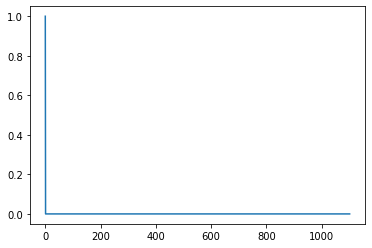

In [19]:
plt.plot(imp);   # use ';' to remove text output from plot

Or we can listen to it:

In [20]:
Audio(imp, rate=22050) # The default sampling frequency for the signals we create is 22050 Hz (but can be changed)

We can examine the response at a particular place along the basilar membrane to our impulse via the `gammatone` method: 

In [21]:
bm1000 = aud.gammatone(imp)    # defaults to 1 kHz; see doc later

Use `plt.plot` function to plot `bm1000`.

In [22]:
plt.plot(bm1000); 

This is called an **impulse response** and it completely defines the properties of the gammatone filter.

The response is actually a model of the **displacement** of the basilar membrane at a given location.

In [23]:
plt.ylabel('displacement')   # Matplotlib methods look like Matlab commands
plt.xlabel('time (samples)')
plt.title('Impulse response of gammatone filter at 1 kHz');
plt.plot(bm1000);

In [24]:
Audio(bm1000, rate=22050)   

This is the response at a single **place** along the modelled basilar membrane. Which place? By checking the documentation of gammatone we see that it defaults to 1000 Hz. 

In [25]:
help(aud.gammatone) # check the documentation

Help on function gammatone in module auditory:

gammatone(sig, cf=1000, fs=22050, zero_phase=False, inst_env_and_freq=False)
    Gammatone (auditory) filter
    
    Returns: filter output
    
    sig: input signal
    cf: centre frequency of filter
    fs: sampling frequency
    zero_phase: if true, output has same phase as input (useful for resynthesis applications)
    inst_env_and_freq: if true, return instantaneous envelope and frequency instead,
          otherwise returns gammatone output signal
    
    e.g.
    
    bm = gammatone(speech)   # returns model of BM displacement
    env, _ = gammatone(speech, inst_env_and_freq=True)       # extract instantaneous envelope
    env, instf = gammatone(speech, inst_env_and_freq=True)   # exract instantaneous envelope & freq
    
    see also: gammatone_bank



So this time use a lower centre frequency:

In [26]:
bm300 = aud.gammatone(imp, cf=300)

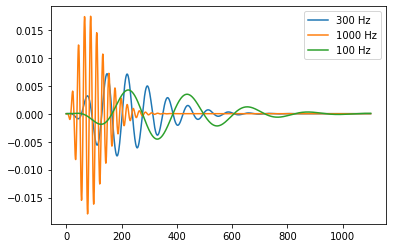

In [27]:
plt.plot(bm300, label='300 Hz')   # label: legend does the right thing
plt.plot(bm1000, label='1000 Hz')

bm100 = aud.gammatone(imp, cf=100)
plt.plot(bm100, label='100 Hz')
plt.legend();

Or, if we prefer, space them out a bit using the `plot_sigs` function:

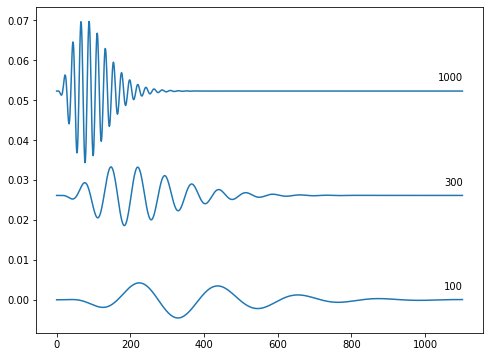

In [28]:
aud.plot_sigs([bm100, bm300, bm1000], gap=1.5, labels=['100','300','1000']);

It is apparent that the response at each place along the membrane is different. In particular

1. The membrane response to an impulse reflects the centre frequency of the filter modelling the membrane. A low centre frequency produces a lower frequency response (listen to the difference).

2. The time it takes for the basilar membrane response to build up to maximum is longer in the low frequencies.

> aside: We can also see where the name *gammatone* comes from. The **envelope** of the impulse response is a gamma function $t^n e^{-bt}$, and the **fine structure** is a tone, $cos (\omega t)$. (Here, $b$ is related to bandwidth, and filter order $n$ is 3)

In [29]:
# return Hilbert envelope and instantaneous frequency
env300, instf300 = aud.gammatone(imp, cf=300, inst_env_and_freq=True)  

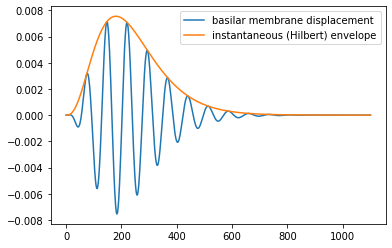

In [30]:
plt.plot(bm300, label='basilar membrane displacement')
plt.plot(env300, label='instantaneous (Hilbert) envelope')
plt.legend();

An impulse affects all frequencies, so we see a response at all points along the basilar membrane. 

To see localised responses we need to use a signal with varied frequency content. Later we'll see the response to a speech signal. For now, let's use a simple **tone**.

### This is were you have to provide some more input. :)

In [31]:
help(aud.tone) # check the documentation and write code that creates a frequency of 300 Hz

Help on function tone in module auditory:

tone(frequency=1000, duration=1.0, phase=0.0, amplitude=1.0, fs=22050)
    Generates a tone (sinusoid) or a series of tones
    
    frequency: of tone, in Hz
    duration: total duration of signal in seconds
    phase: starting phase, in radians
    fs: sampling frequency
    
    if lists or arrays of values are provided, a tone complex will be generated. In this case,
    specifying phase or amplitude as a list/array is optional. If scalar, this value will be
    used for all component tones.
    
    e.g.
    
    t = tone()
    t = tone(frequency=200, amplitude=10)   
    t = tone(frequency=[100,200,500])
    t = tone(frequency=[100,200], amplitude=[1,2])
    t = tone(frequency=[100,200], amplitude=[1,2], phase=[0, np.pi])
    
    See also: harmonic_series



In [32]:
tone300 = aud.tone(frequency=300) # INSERT CODE HERE

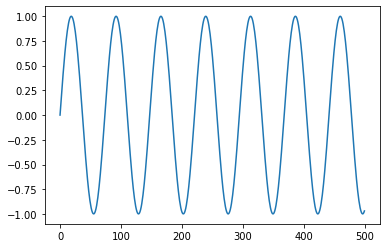

In [33]:
plt.plot(tone300[0:500]);   # just look at first 500 samples

In [34]:
Audio(tone300, rate=22050)   

Pass tone300 through a gammatone filter with a center frequency of 300 Hz

In [35]:
bm300 = aud.gammatone(tone300, cf=300) # INSERT CODE HERE

Get a slice from 0 to 500 of this `bm300` variable and plot it.

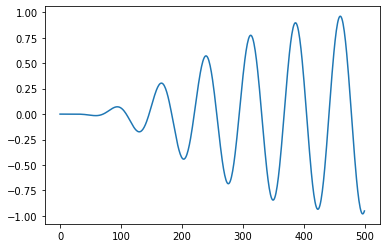

In [36]:
plt.plot(bm300[:500]);# INSERT CODE HERE

Let's listen.

In [37]:
Audio(bm300[:500], rate=22050)   

Pass tone300 through a gammatone filter with a center frequency of 1000 Hz

In [38]:
bm1000 = aud.gammatone(tone300, cf=1000) # INSERT CODE HERE    # pass through gammatone with a higher centre frequency (1000 Hz)

Plot it! :)

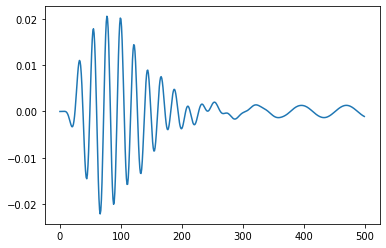

In [39]:
plt.plot(bm1000[:500]); # INSERT CODE HERE;   # after initial transient, entrains to 300 Hz

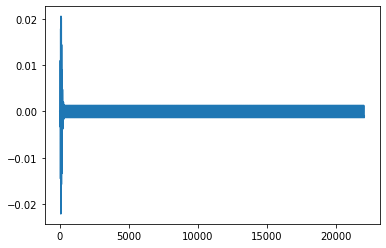

In [40]:
plt.plot(bm1000);

Listen to it.

In [41]:
Audio(bm1000, rate=22050)                  # still sounds like 300 Hz!

Crete 3 outputs of a gammatone filter with center frequencies of 100, 200, and 500 Hz. Place tone300 as input into all of them.

In [42]:
bm100 = aud.gammatone(tone300, cf=100) # INSERT CODE HERE
bm200 = aud.gammatone(tone300, cf=200) # INSERT CODE HERE
bm500 = aud.gammatone(tone300, cf=500) # INSERT CODE HERE

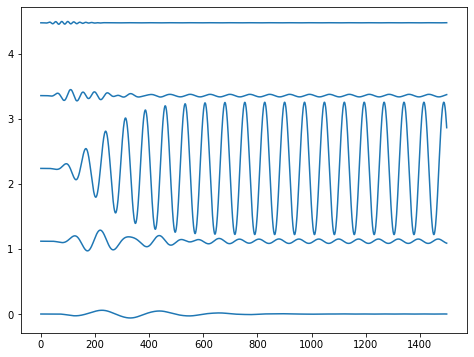

In [43]:
limit = 1500
aud.plot_sigs([bm100[:limit], bm200[:limit], bm300[:limit], bm500[:limit], bm1000[:limit]], gap=1.1);

So we see that 

> 1. The amplitude of the response depends on how close the input signal frequency is to the centre frequency of the filter modelling the basilar membrane.

> 2. The frequency of the response is related to the input signal frequency (in the case of a tonal input)

There is a function called `gammatone_bank` which computes the response at a number of centre frequencies:

In [44]:
# 50 filters linearly spaced between 100 and 1000 Hz
bms = aud.gammatone_bank(tone300, cfs=np.linspace(100,1000,50), zero_phase=False)

In [45]:
help(aud.gammatone_bank)  # check documentation

Help on function gammatone_bank in module auditory:

gammatone_bank(sig, low_cf=50, high_cf=8000, n=55, cfs=None, fs=22050, zero_phase=False, inst_env_and_freq=False)
    Outputs response of a bank of gammatone filters.
    
    sig: input signal
    low_cf, high_cf: lower and upper centre frequencies
    cfs: array of centre frequencies in Hz
    n: number of filters
    fs: sampling frequency
    zero_phase: if true, output has same phase as input (useful for resynthesis applications)
    inst_env_and_freq: if true, return instantaneous envelope and frequency instead,
          otherwise returns gammatone output signal
    
    If low_cf, high_cf and n are provided, filter centre frequencies are linearly-spaced
       on the ERB-rate scale. Centre frequencies can also be specified as an array or 
       list in cfs, in which case low_cf, high_cf and n are ignored. This option is
       useful if a non-ERB-rate filter spacing is desired.
    
    See also: gammatone



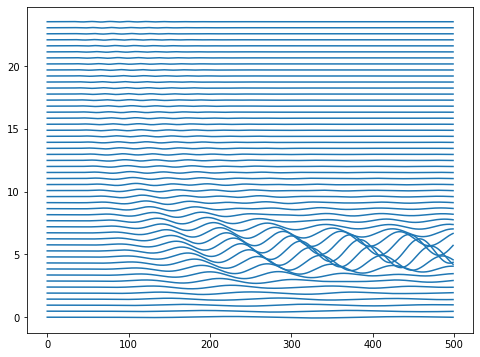

In [46]:
aud.plot_sigs(bms[:,0:500],gap=0.5);         # bms is a 2D array

Now, the mapping from **place** along the BM to frequency is evident (although note that we are using a linear frequency spacing at present). It becomes more so if we introduce a second tone at a different frequency. 

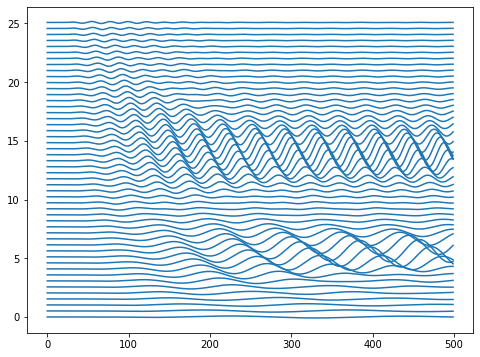

In [47]:
# USE THE aud.tone() FUNCTION TO CREATE THE SUM OF TWO TONES AT 300 and 600 HZ
tones = aud.tone(frequency=[300,600])# INSERT CODE HERE
bms = aud.gammatone_bank(tones, cfs=np.linspace(100,1000,50))
aud.plot_sigs(bms[:,0:500],gap=0.5);

Again, notice how not just a single frequency channel but a whole group of filters respond to the *nearest* frequency component in the input signal; and notice how the response in terms of *fine time structure* is actually quite similar across these channels.

In [48]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
#   You will need to install this to get animations to work 
#     (not part of Anaconda nor auditory toolkit)
#
# UPDATE 21-4-2021: Since Matplotlib 2.1, JSAnimation is supposed to be a part of Matplotlib. However, I have not checked it.

from matplotlib import animation
from JSAnimation import IPython_display

def init_BM():
    line.set_data([], [])
    return line,

def animate_BM(i):
    y = gts[:,i]
    line.set_data(xpts, y)
    return line,

Let's now create TWO tones, one high and one low, both of duration of 0.15 s. Feel free to play around with this code.


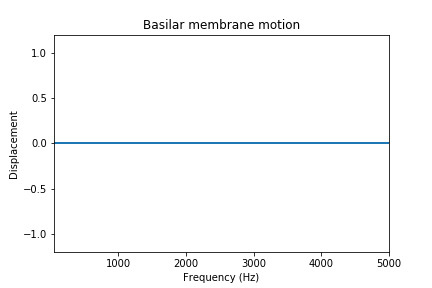
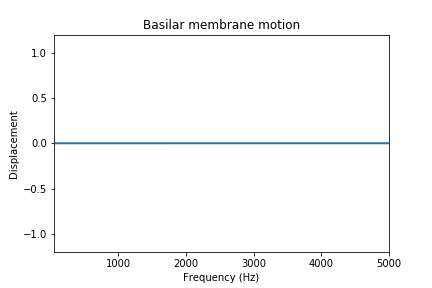
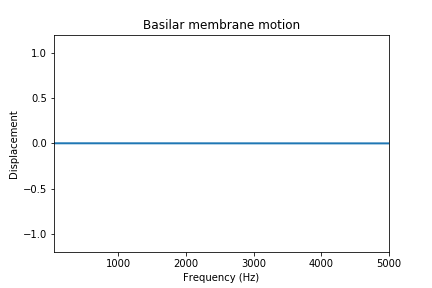
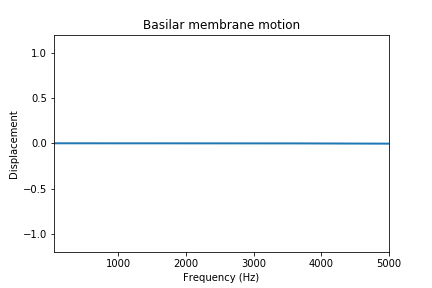
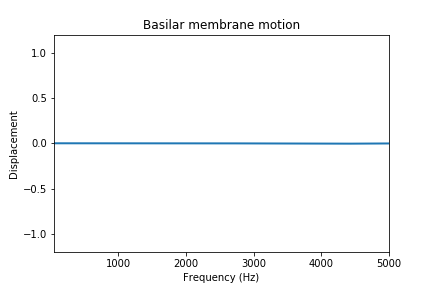
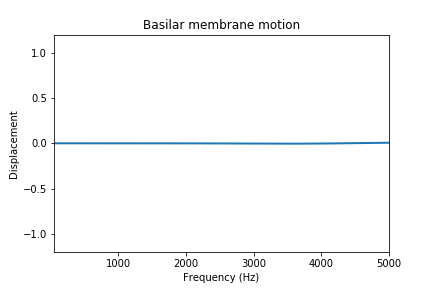
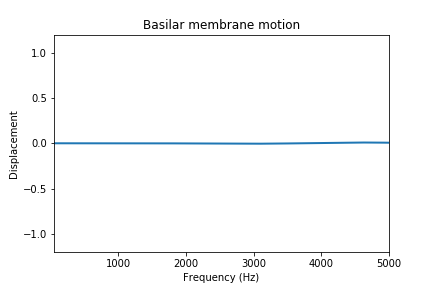
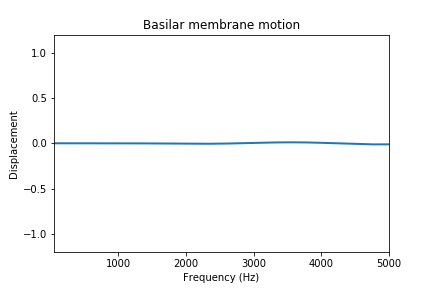
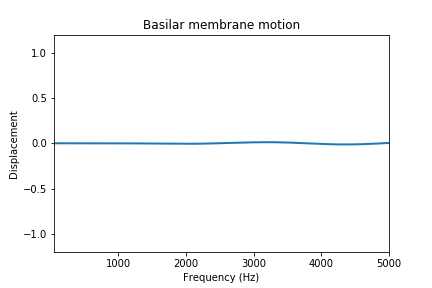
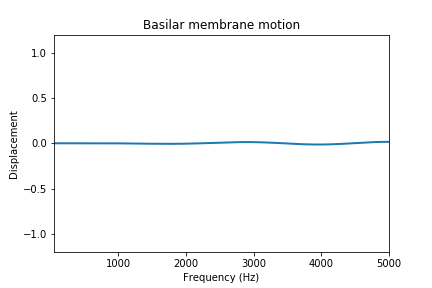
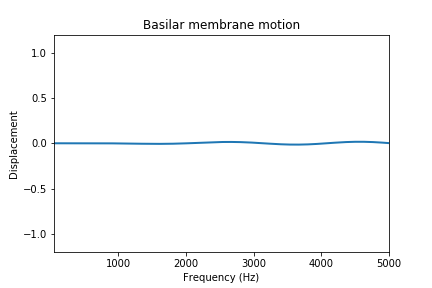
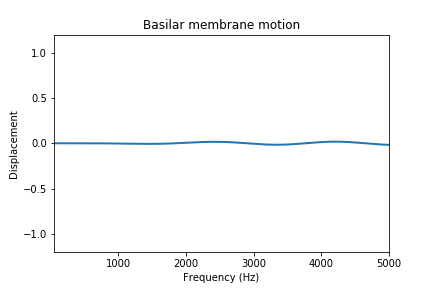
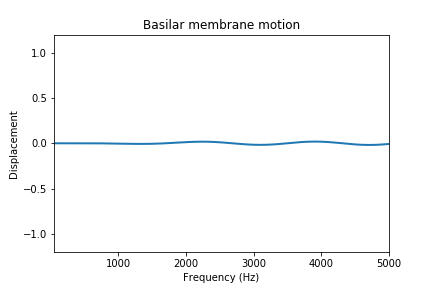
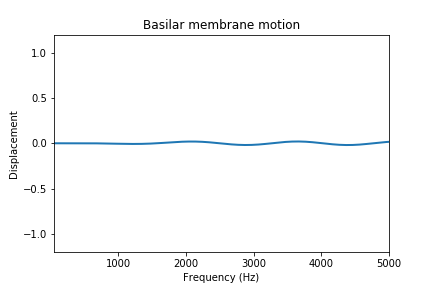
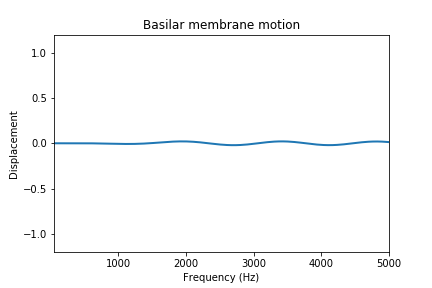
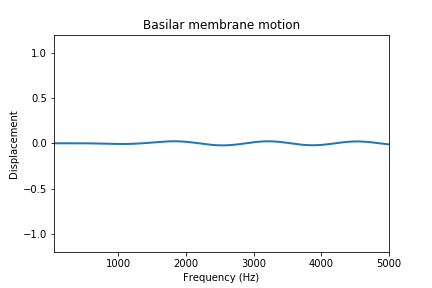
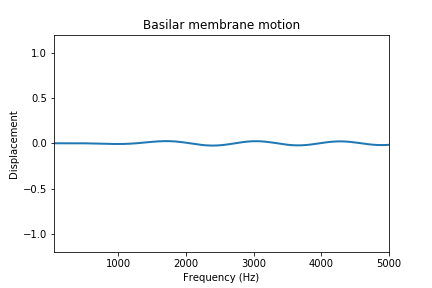
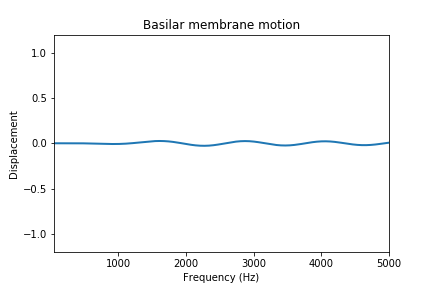
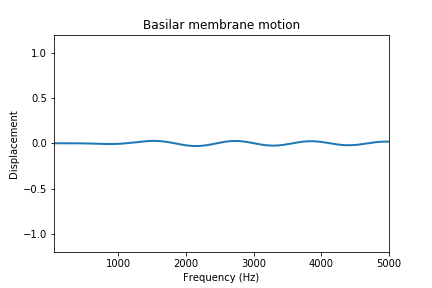
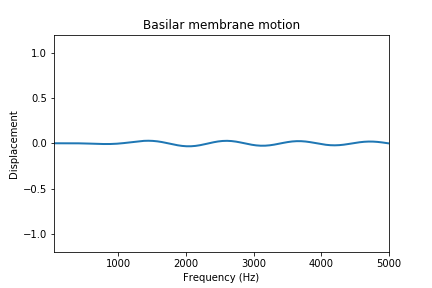
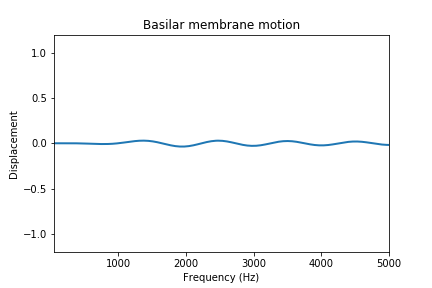
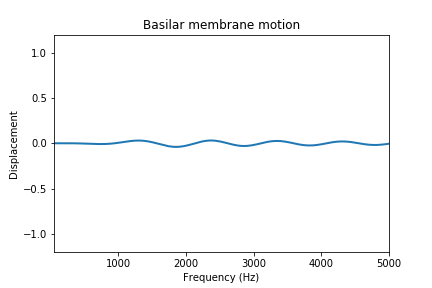
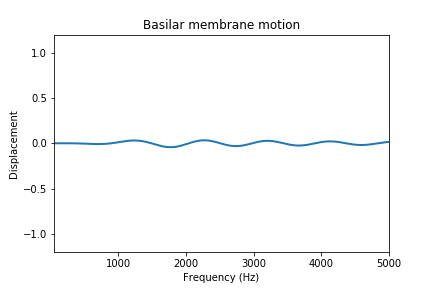
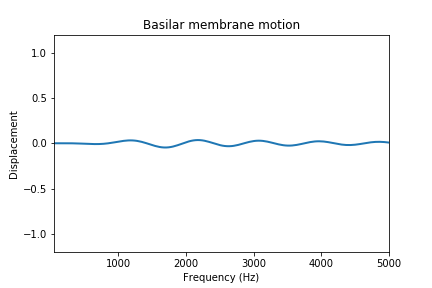
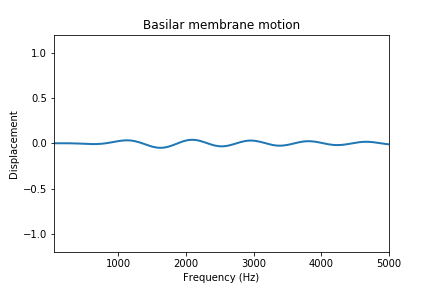
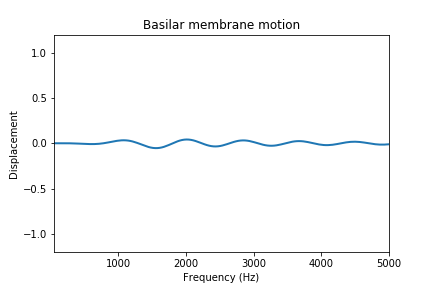
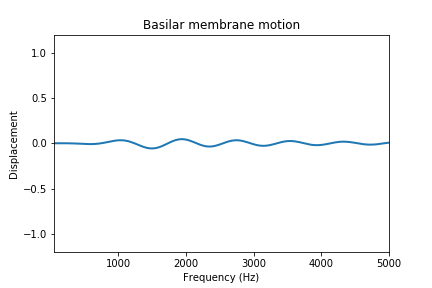
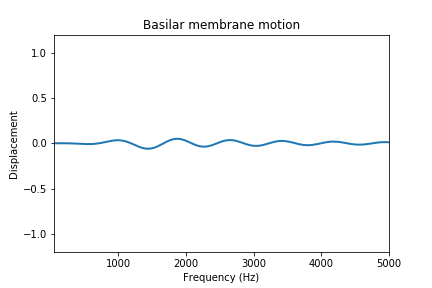
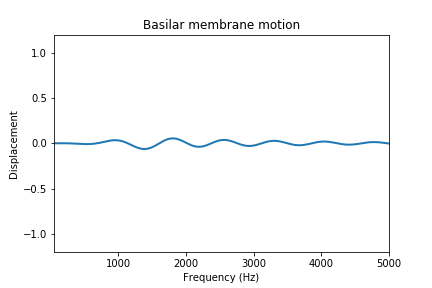
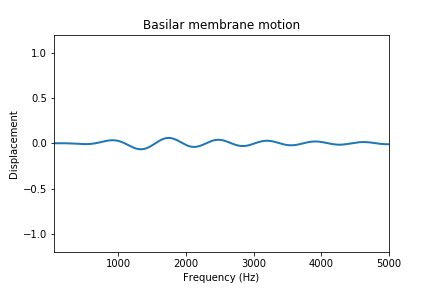
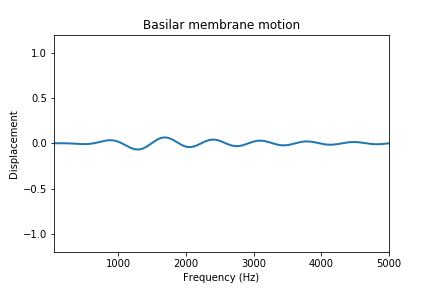
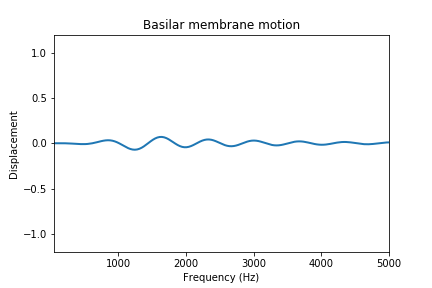
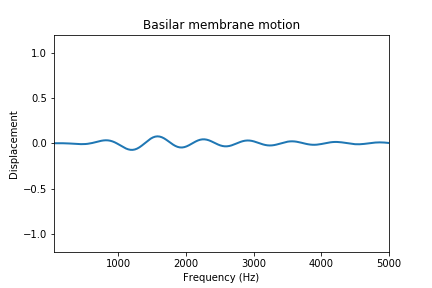
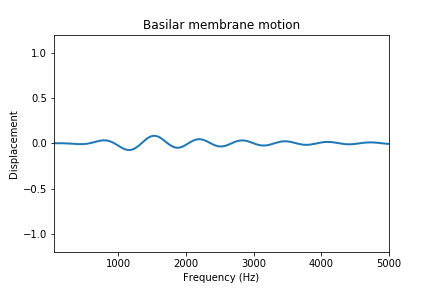
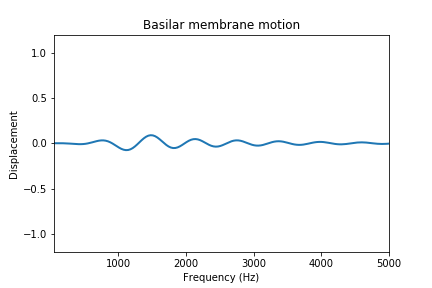
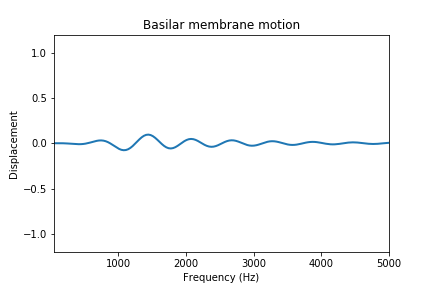
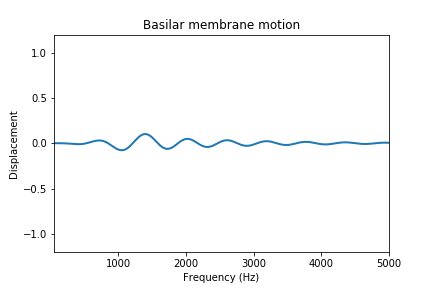
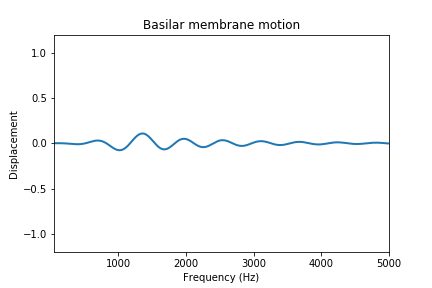
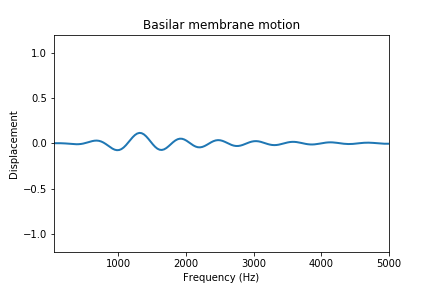
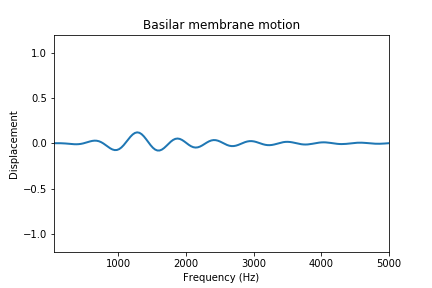
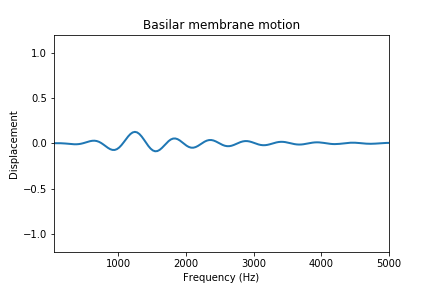
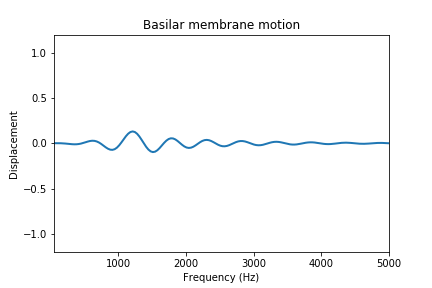
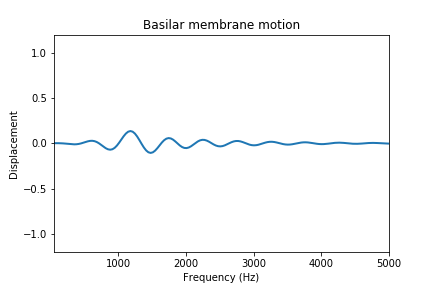
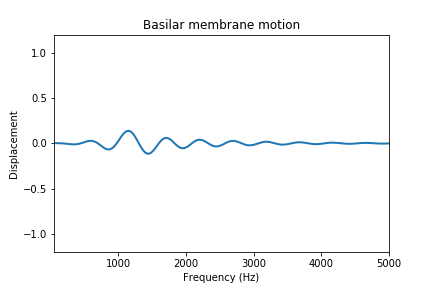
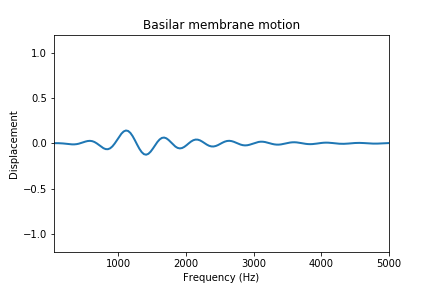
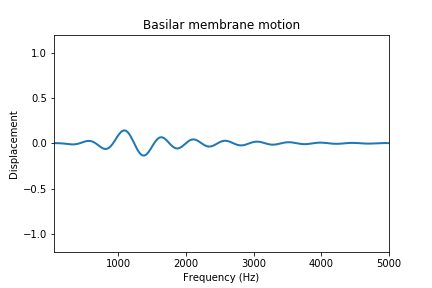
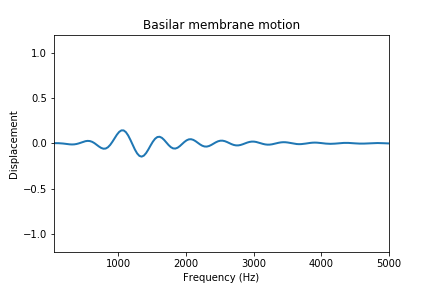
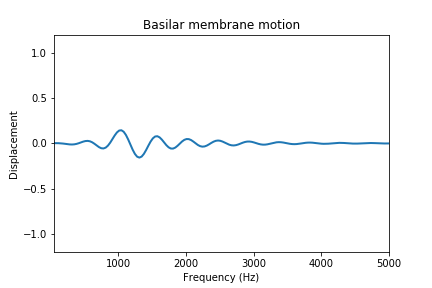
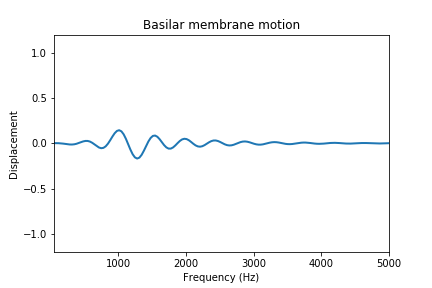
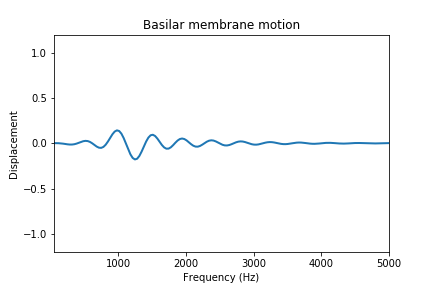
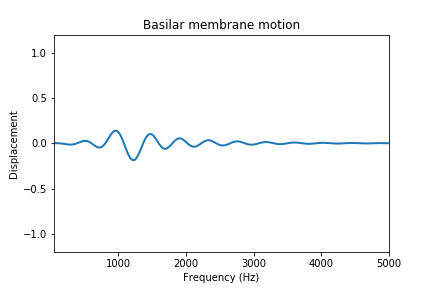
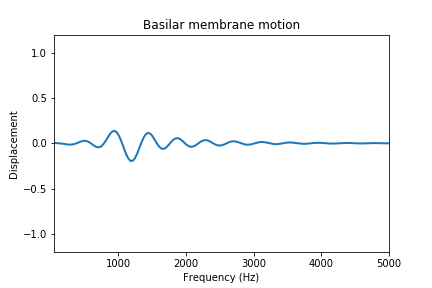
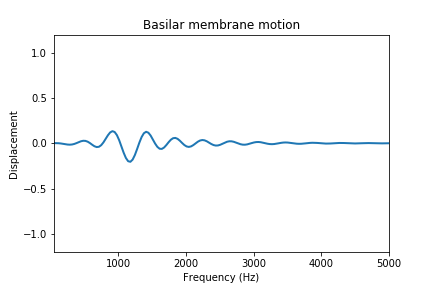
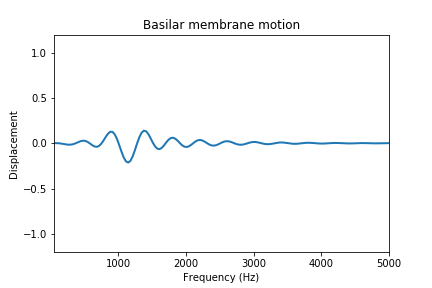
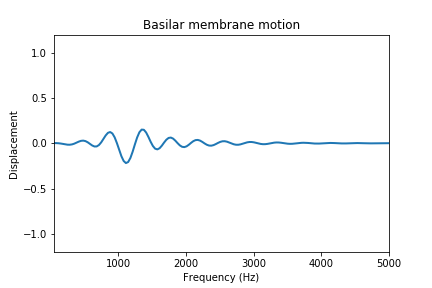
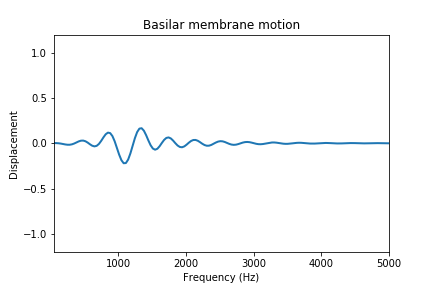
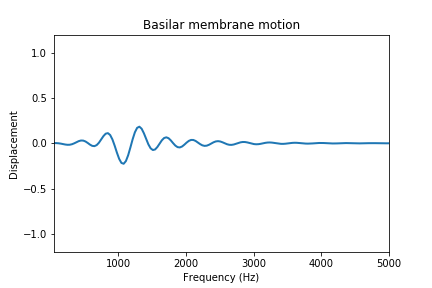
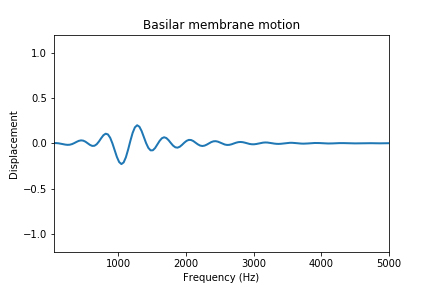
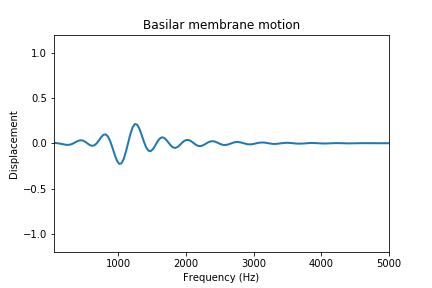
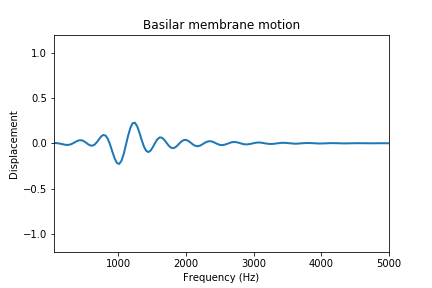
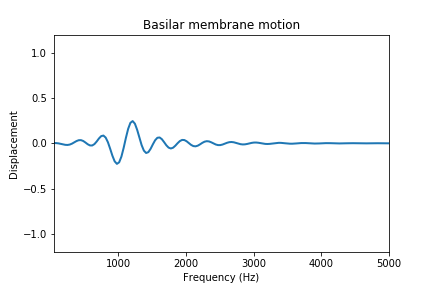
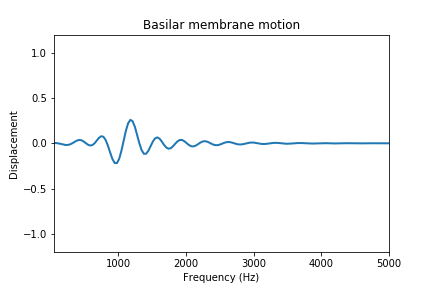
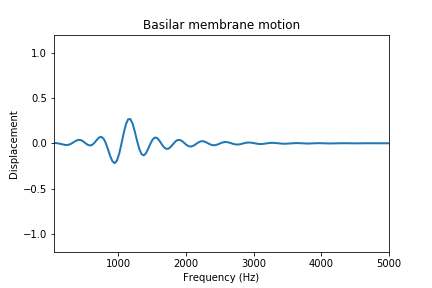
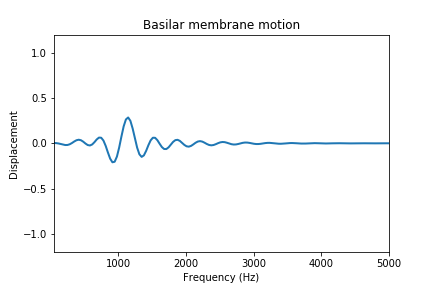
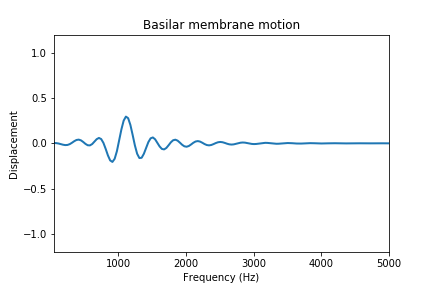
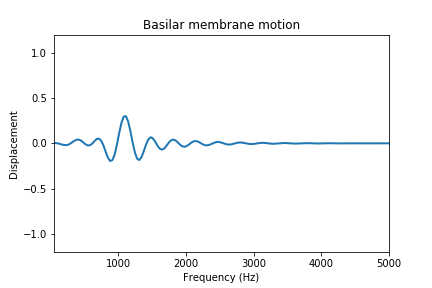
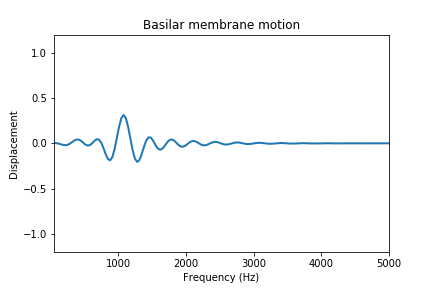
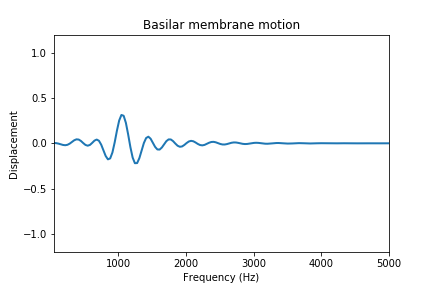
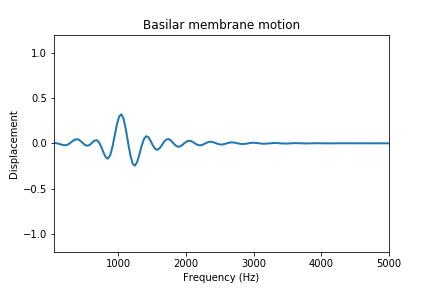
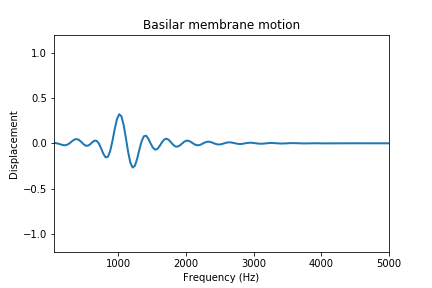
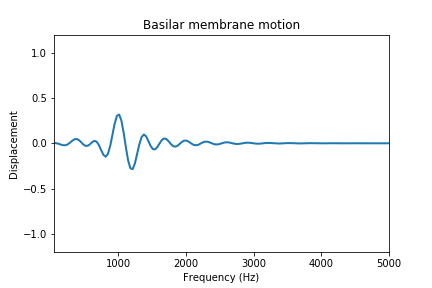
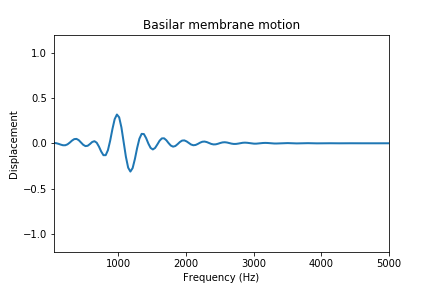
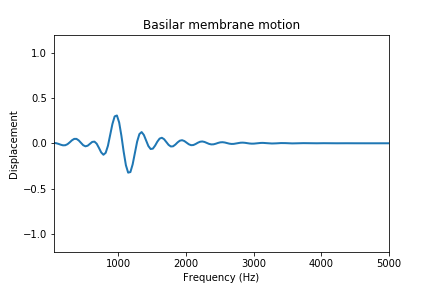
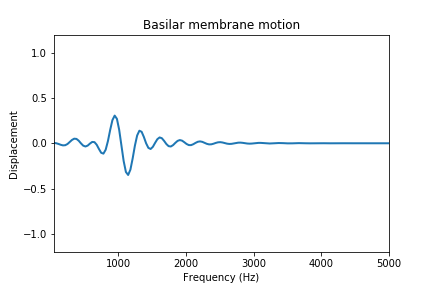
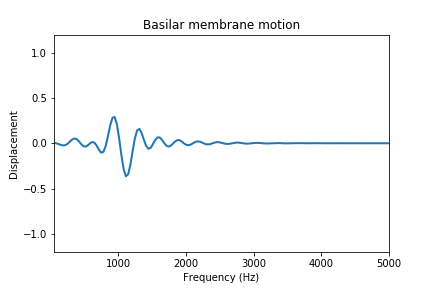
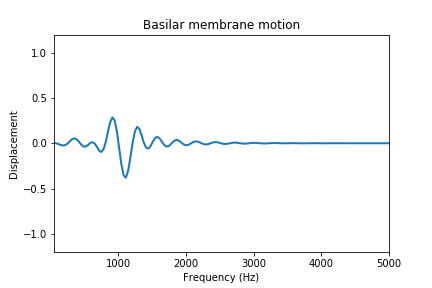
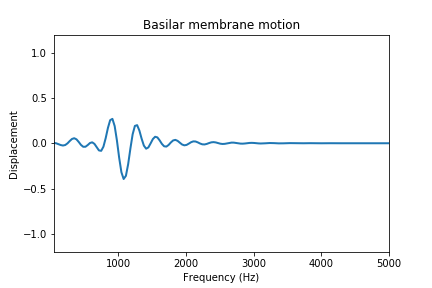
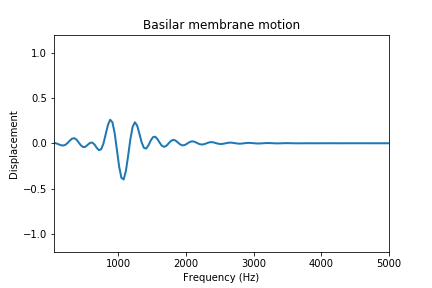
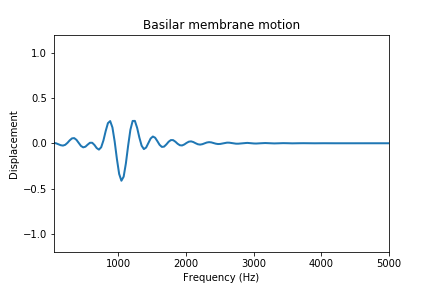
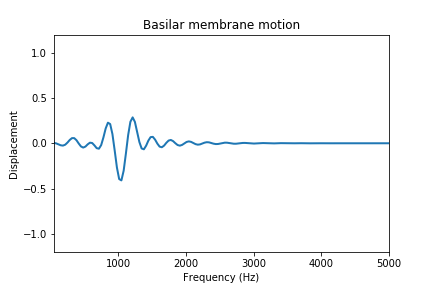
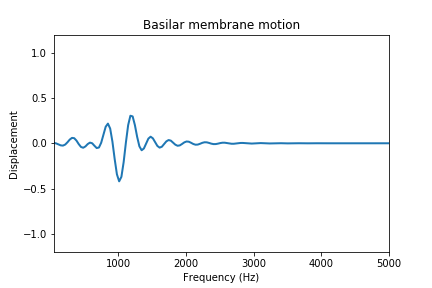
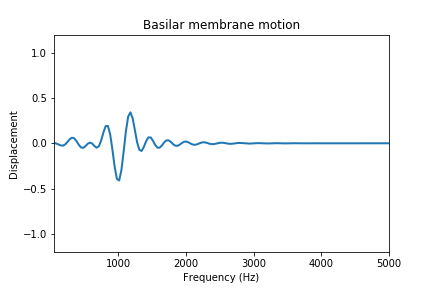
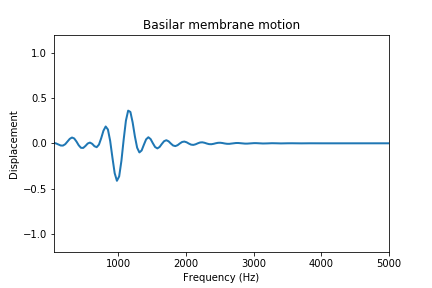
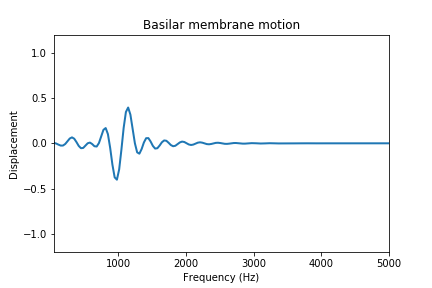
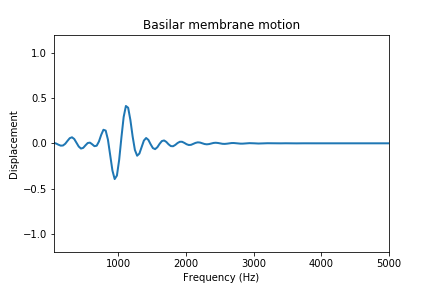
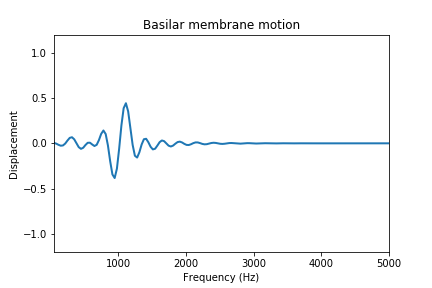
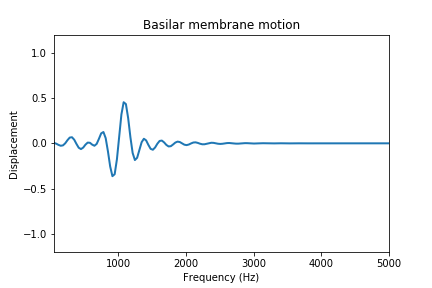
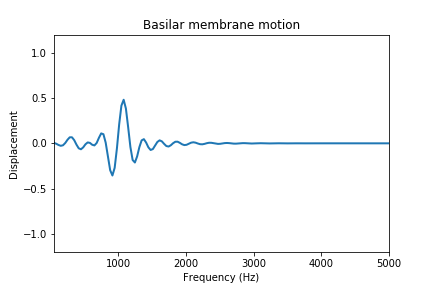
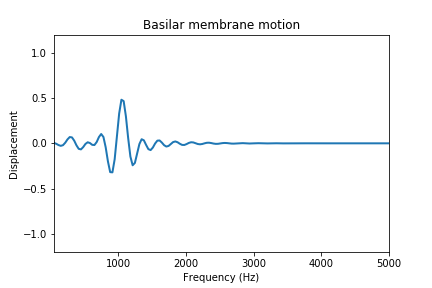
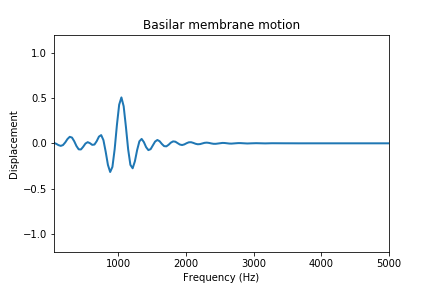
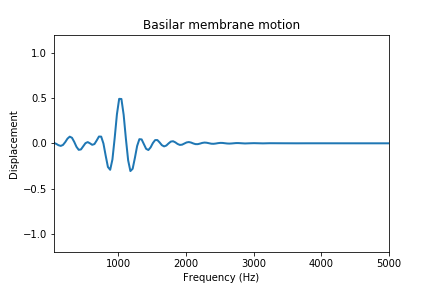
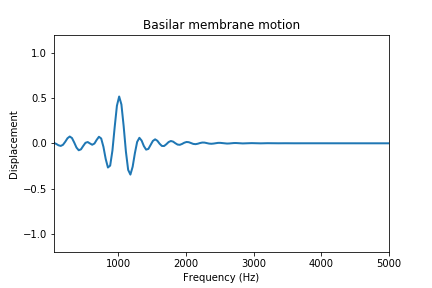
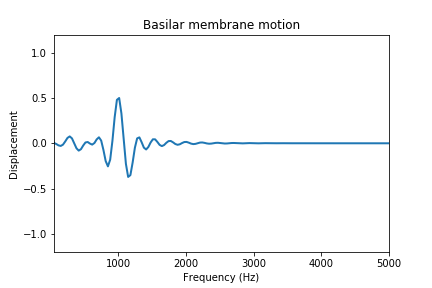
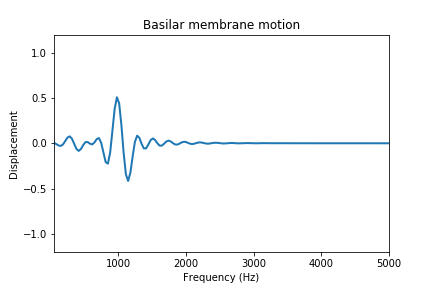
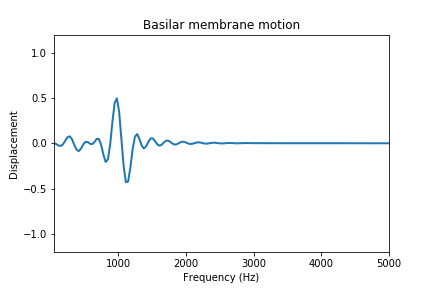
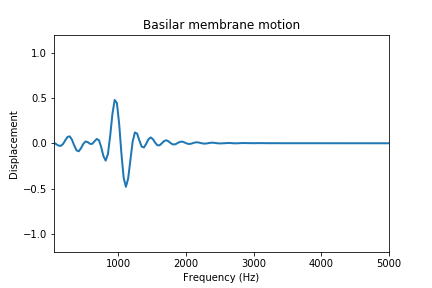
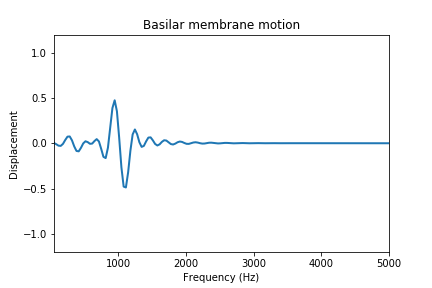
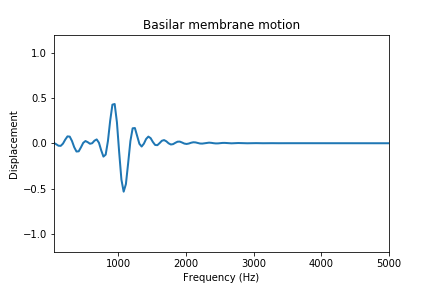
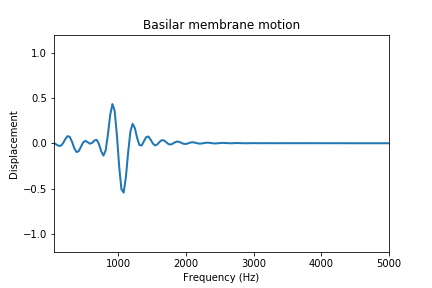
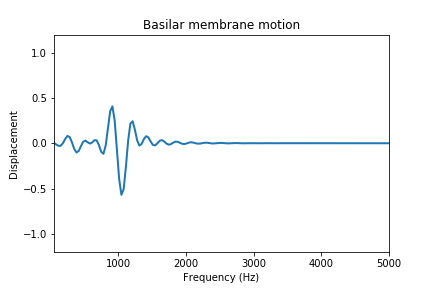
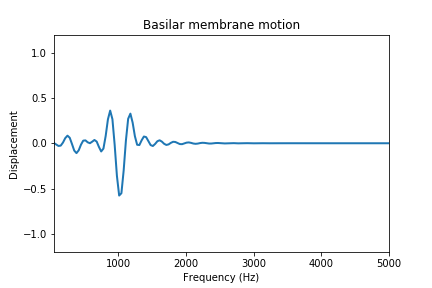
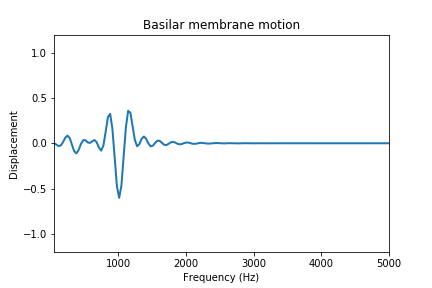
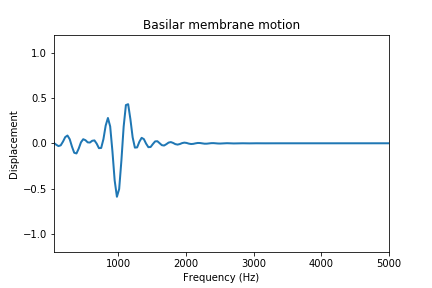
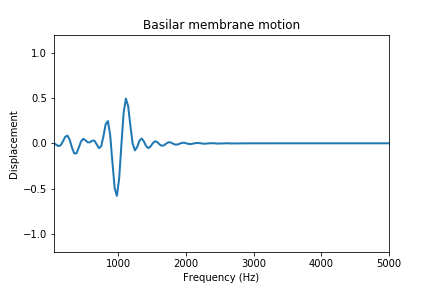
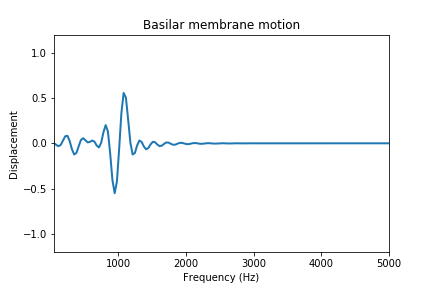
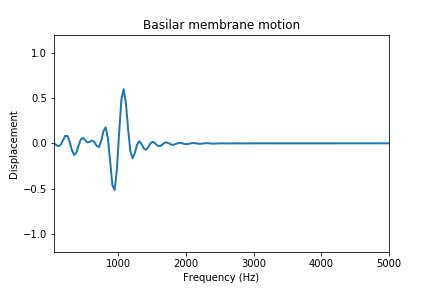
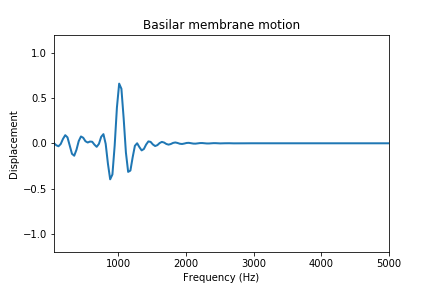
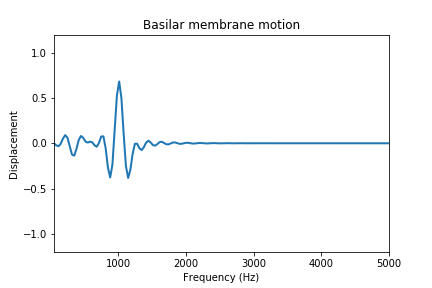
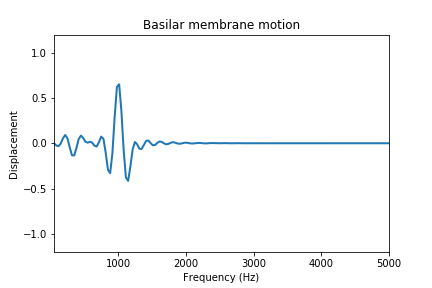
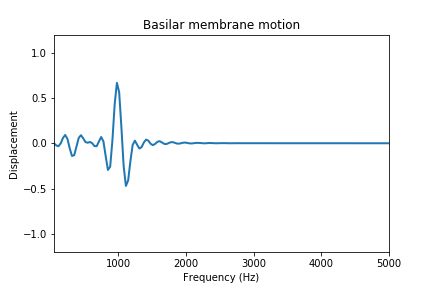
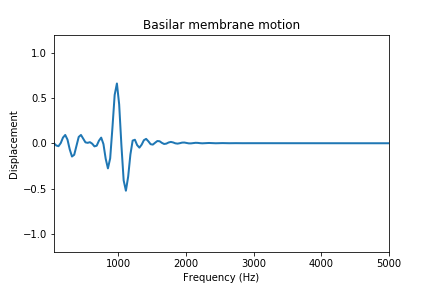
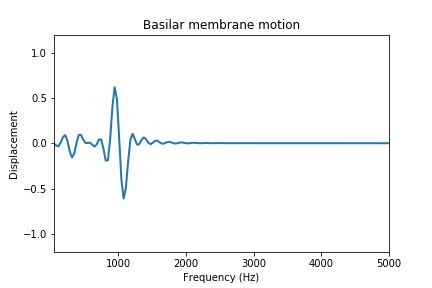
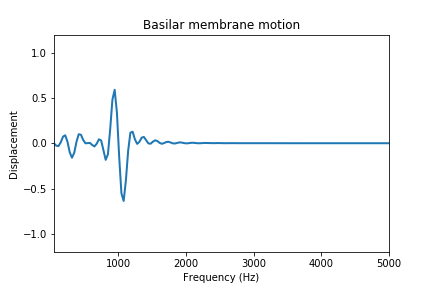
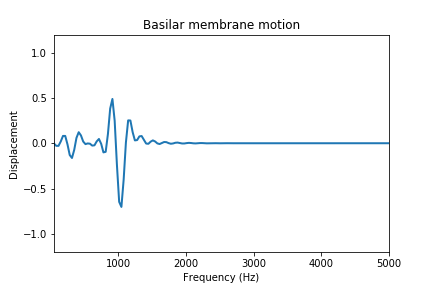
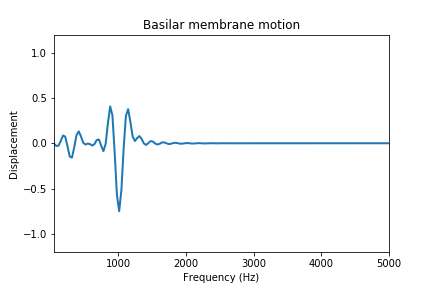
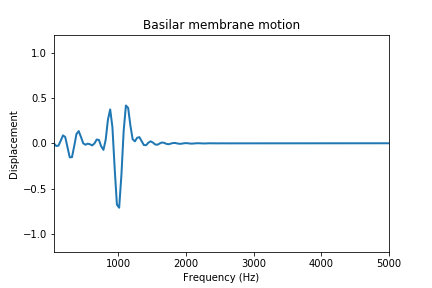
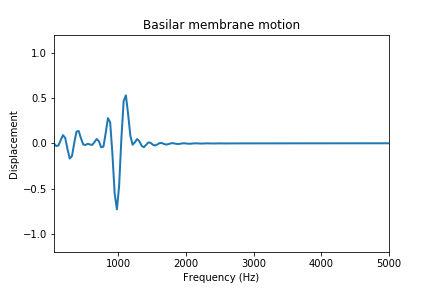
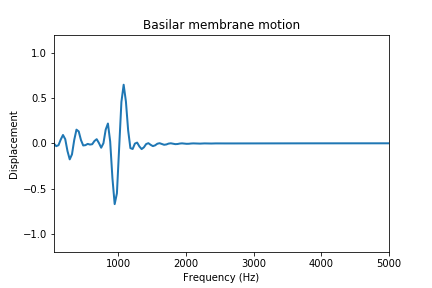
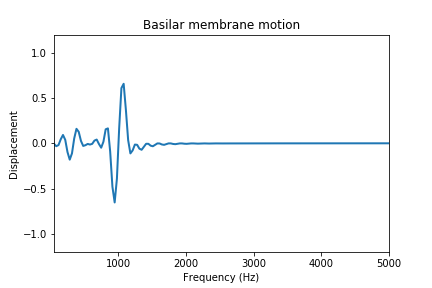
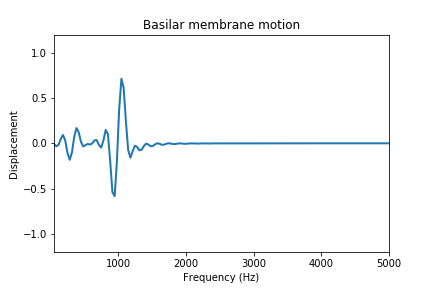
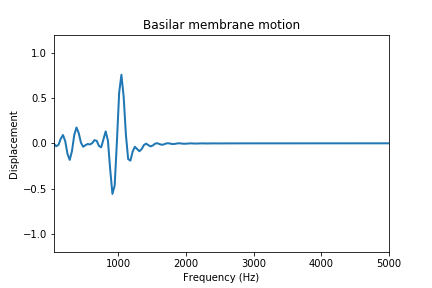
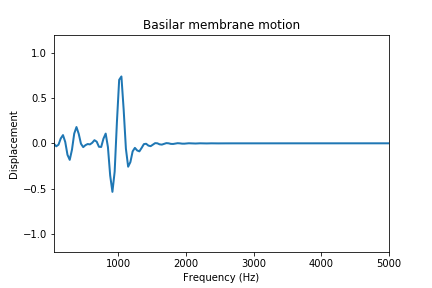
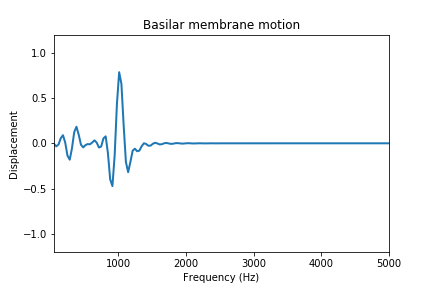
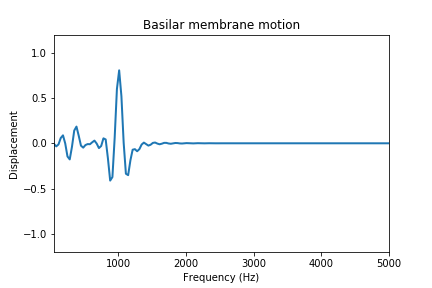
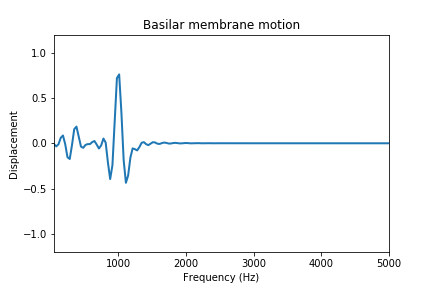
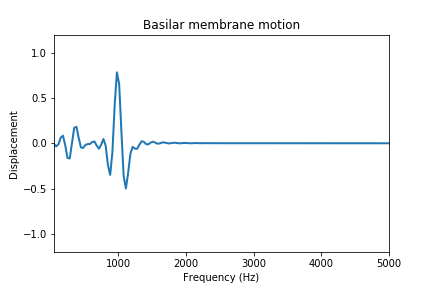
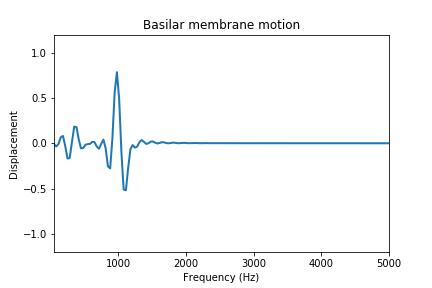
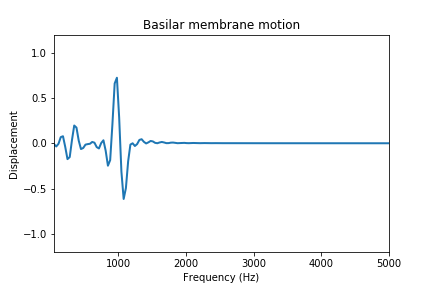
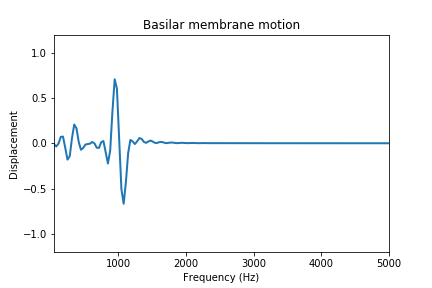
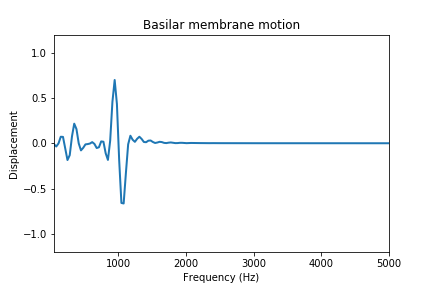
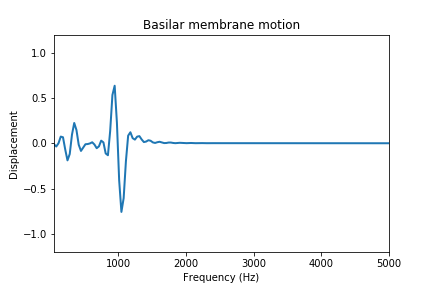
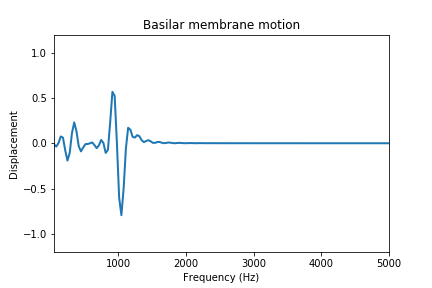
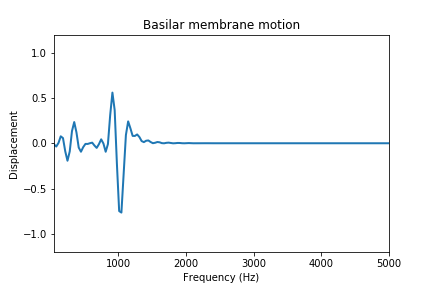
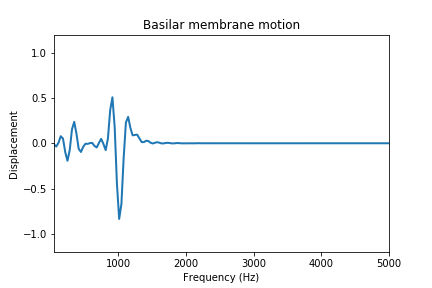
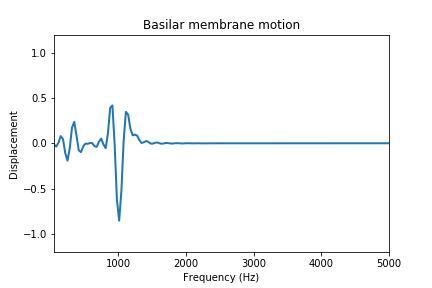
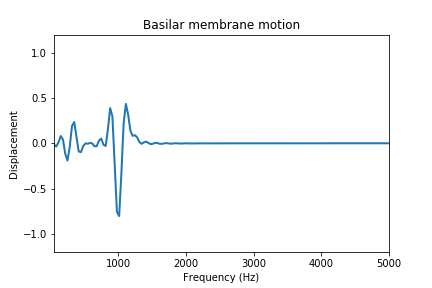

In [49]:
hi_tone = aud.tone(frequency=1000, duration=0.15) # INSERT CODE HERE
lo_tone = aud.tone(frequency=300, duration=0.15) # INSERT CODE HERE

cfs = np.linspace(50,5000,150)
stim = gts = aud.gammatone_bank(lo_tone+hi_tone, cfs=cfs)
n_chans, sig_len = gts.shape
xpts = cfs
fig = plt.figure()
ax = plt.axes(xlim=(50, 5000), ylim=(-1.2, 1.2))
line, = ax.plot([], [], lw=2)
plt.title('Basilar membrane motion')
plt.ylabel('Displacement')
plt.xlabel('Frequency (Hz)')

animation.FuncAnimation(fig, animate_BM, init_func=init_BM, frames=150, interval=50, blit=True)

### The cochlea's nonlinear frequency scale

The above figures do not represent what is going on in the cochlea. The basilar membrane *does not* devote the same amount of space to each frequency region in linear space. Instead, far more space is devoted to say the range 100-200 than the range 2000-2100. The BM's place-to-frequency mapping is well-modelled by the function:

$$ 21.4 \log_{10} (0.00437 f + 1) $$

We refer to the frequency-to-place mapping as **cochleotopic** (or **tonotopic**) at later stages of processing in the auditory system, corresponding to its basis in the basilar membrane's response to different frequency components of a signal.

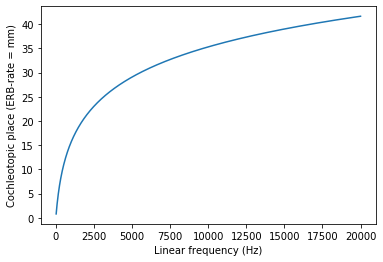

In [50]:
freqs = np.linspace(20,20000,1000)
plt.plot(freqs, aud.Hz2erb(freqs))
plt.xlabel('Linear frequency (Hz)')
plt.ylabel('Cochleotopic place (ERB-rate = mm)');

NB: Although we refer to the units of distance in the model as Erb-rate units, they map neatly on to mm along the cochlea.

As you can see, the first half of the BM (up to 17-20mm) corresponds to the frequency region 20-1500 Hz. This results in a great expansion of the low frequency range relative to the higher frequencies, which are squashed into a relatively narrow region of the membrane.

So in order to reflect the true frequency scale, we should space our gammatone filters linearly with cochleotopic place. This is achieved with the `ErbSpace` function:

In [51]:
cfs = aud.erbspace(50,20000,100)    # generate 100 filters spaced equally in 'cochlear space'

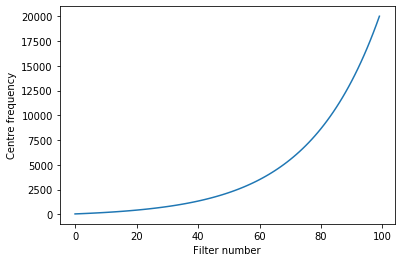

In [52]:
# INSERT CODE TO PLOT cfs VARIABLE
plt.plot(cfs)
plt.xlabel('Filter number')
plt.ylabel('Centre frequency')
plt.show();

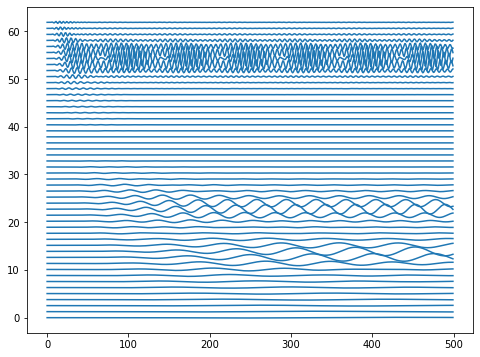

In [53]:
tones = aud.tone(frequency=[300, 600, 3300, 3600])
bms = aud.gammatone_bank(tones, cfs=aud.erbspace(50,5000,50))    # limit to 5 kHz since signal sampled at only 16 k
aud.plot_sigs(bms[:,0:500],gap=0.75);

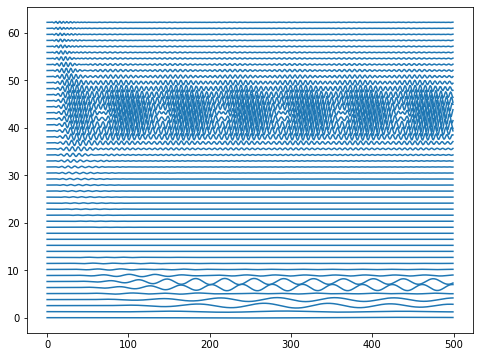

In [54]:
bms = aud.gammatone_bank(tones, cfs=np.linspace(50,5000,50))    # linear spacing
aud.plot_sigs(bms[:,0:500],gap=0.75);


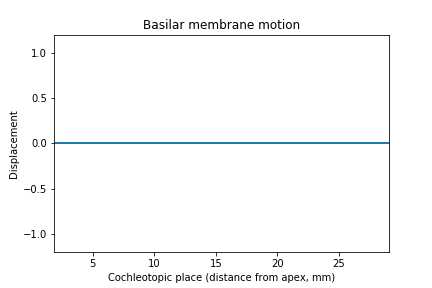
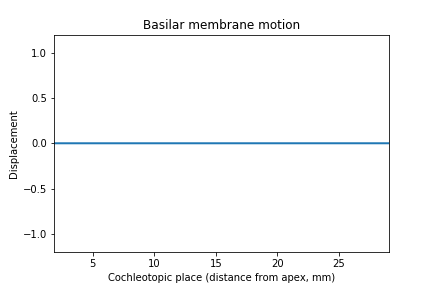
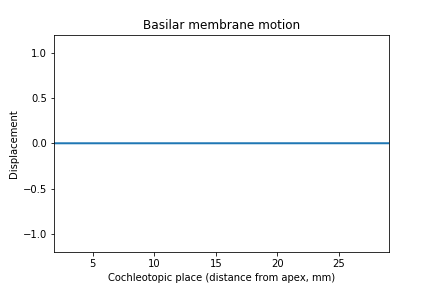
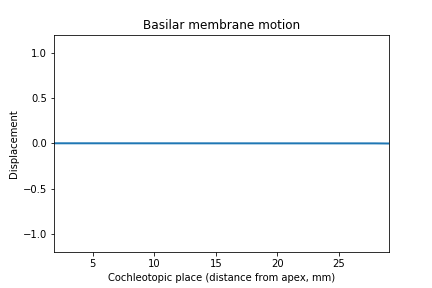
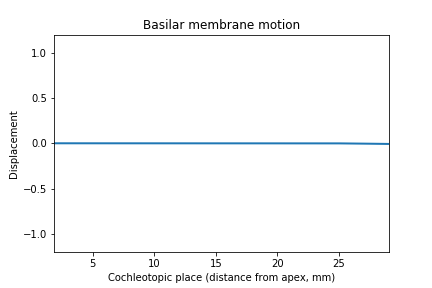
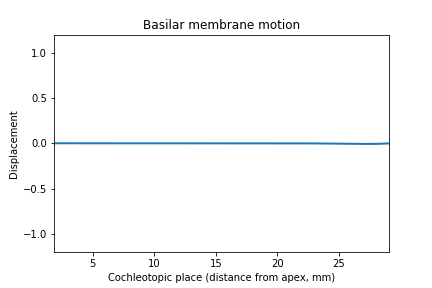
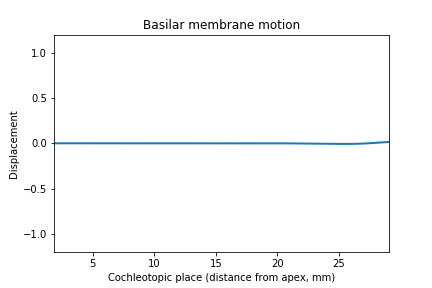
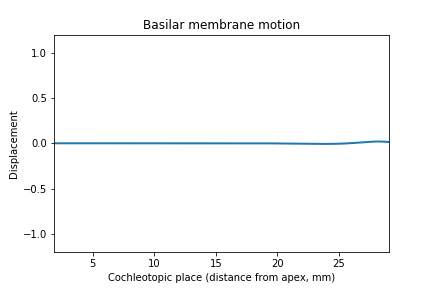
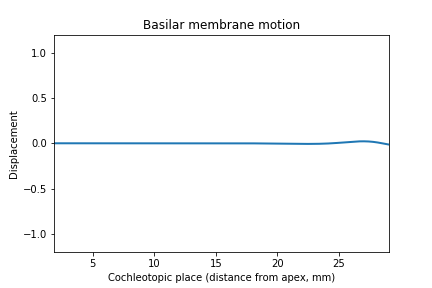
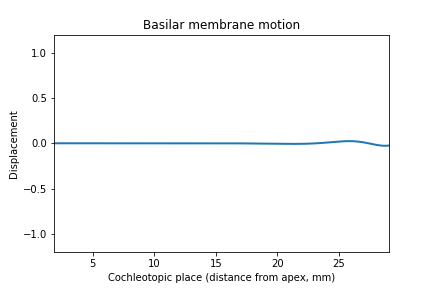
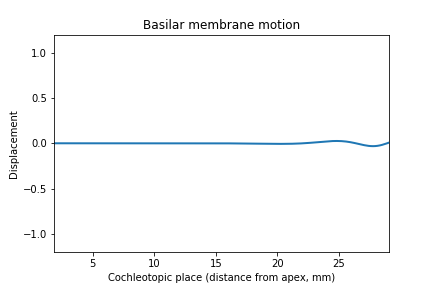
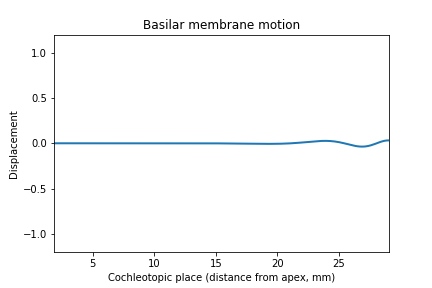
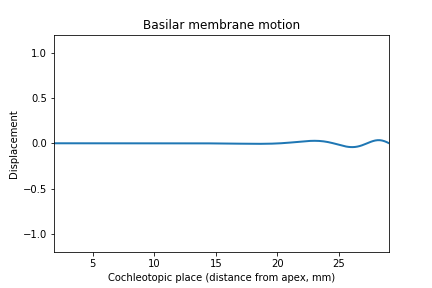
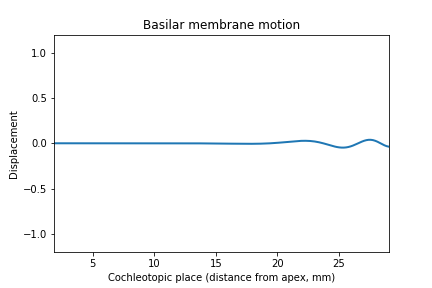
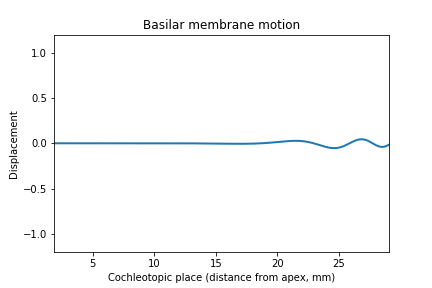
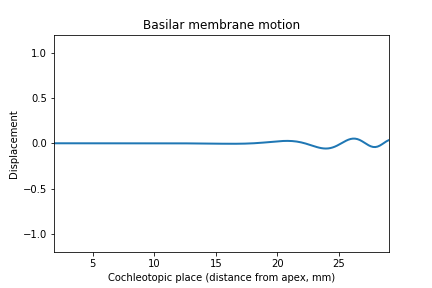
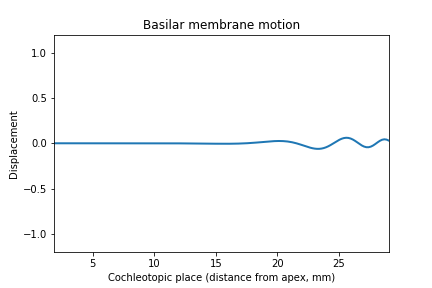
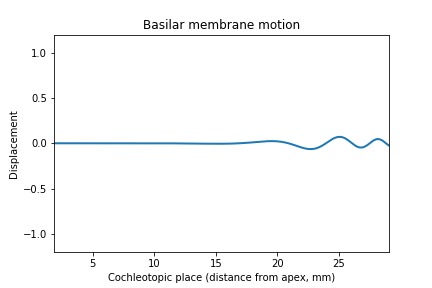
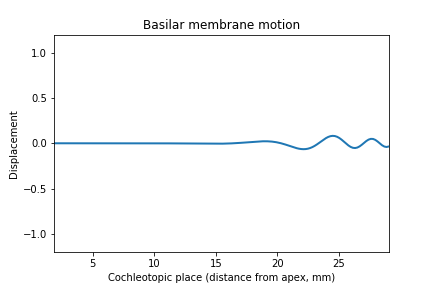
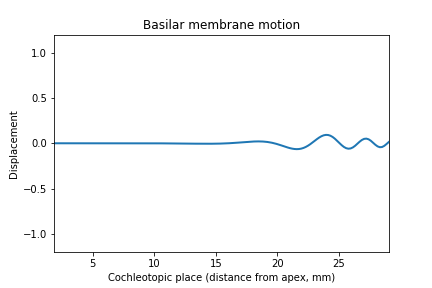
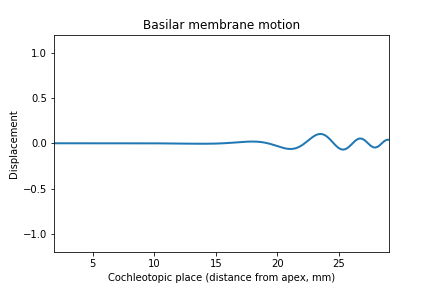
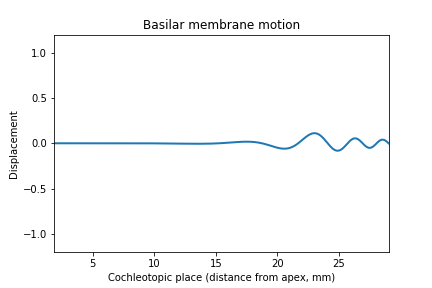
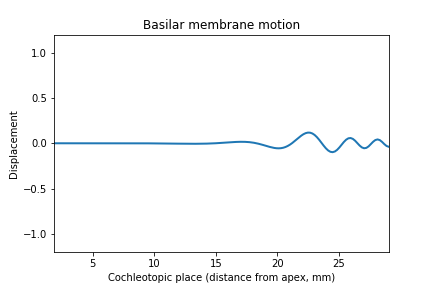
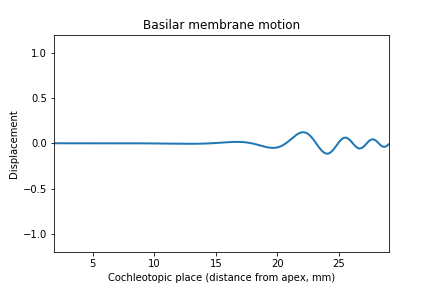
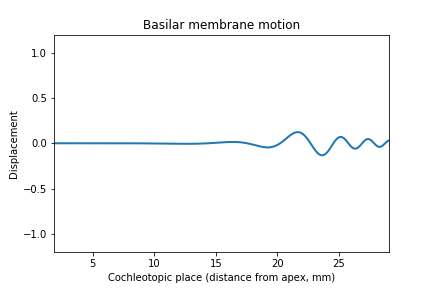
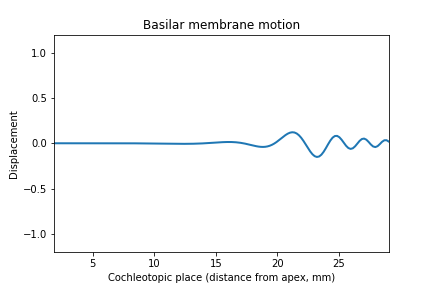
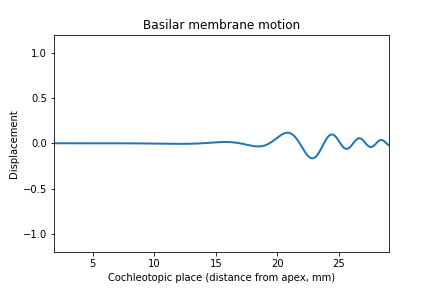
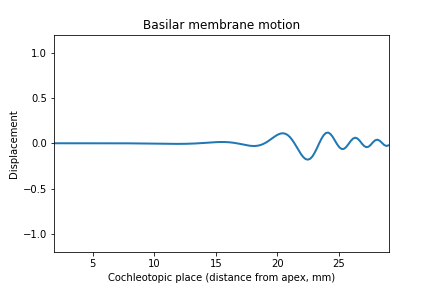
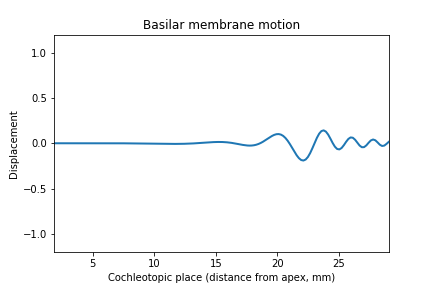
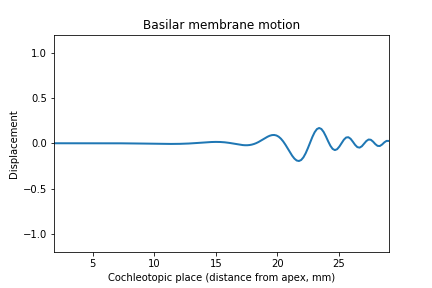
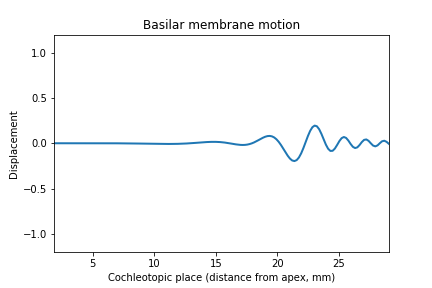
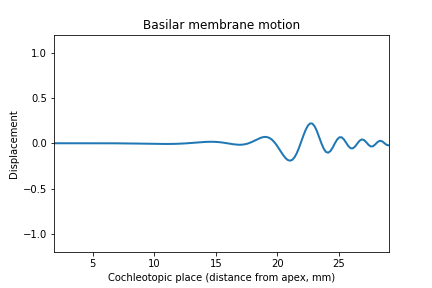
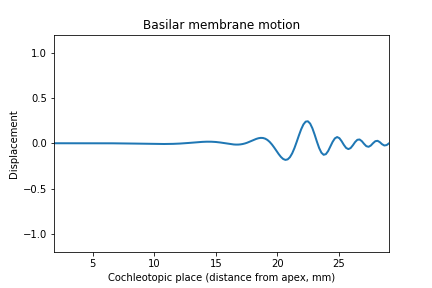
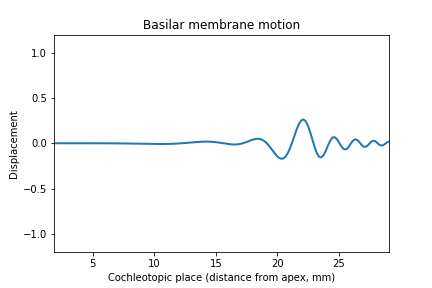
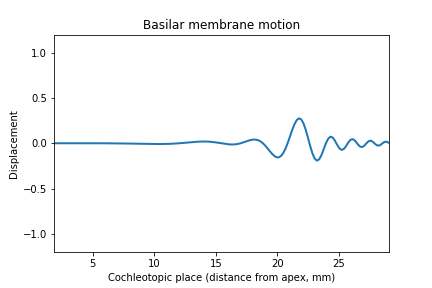
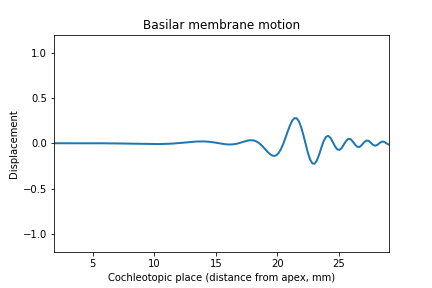
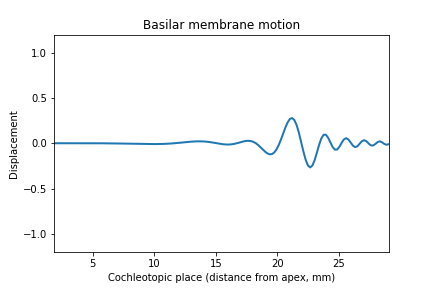
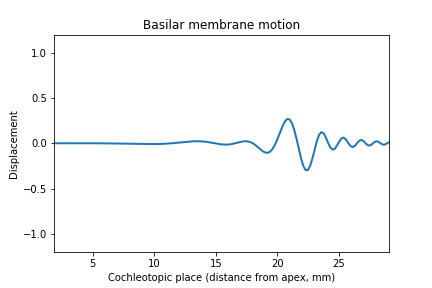
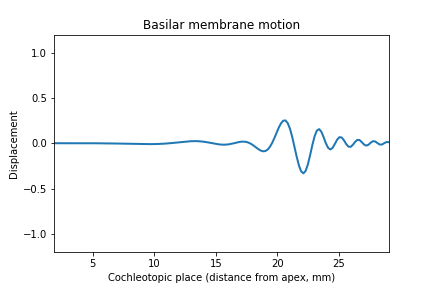
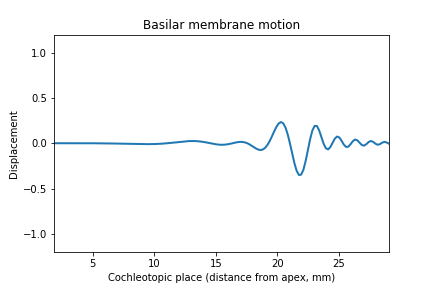
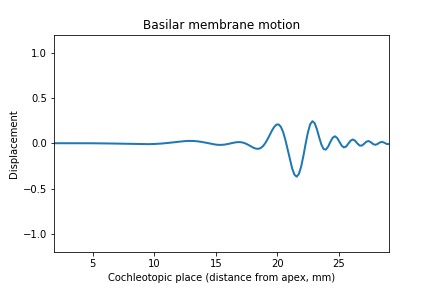
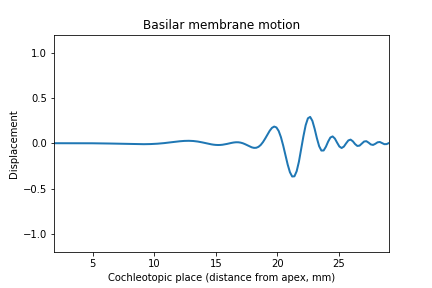
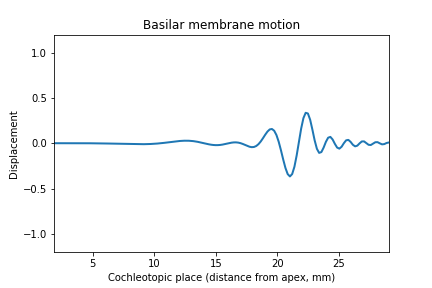
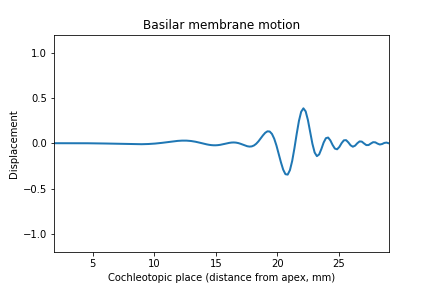
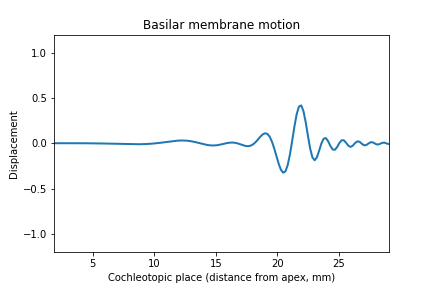
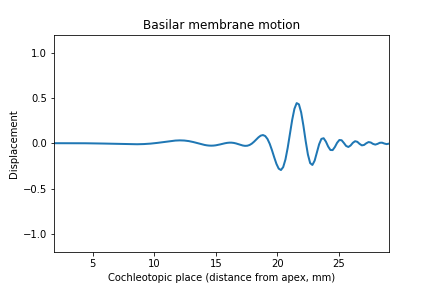
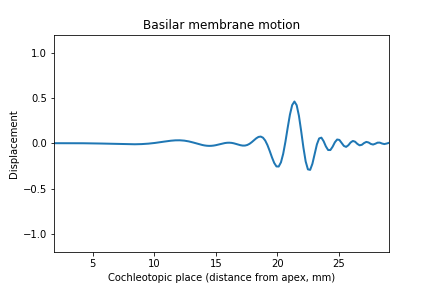
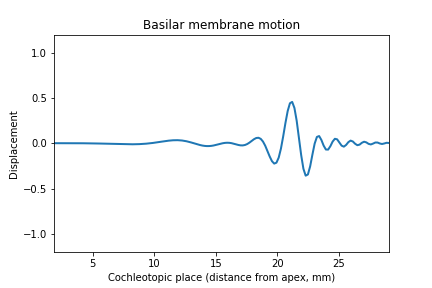
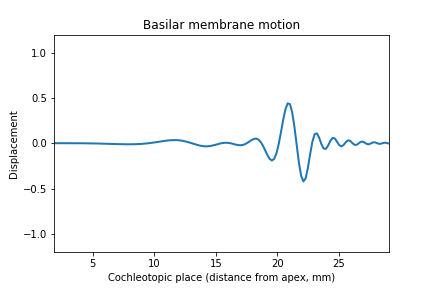
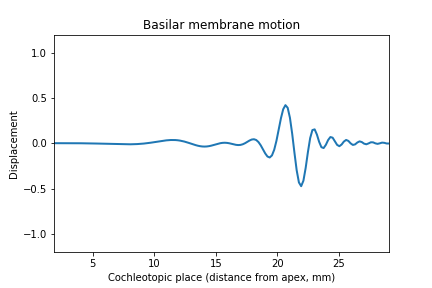
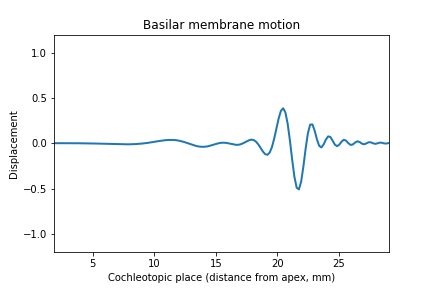
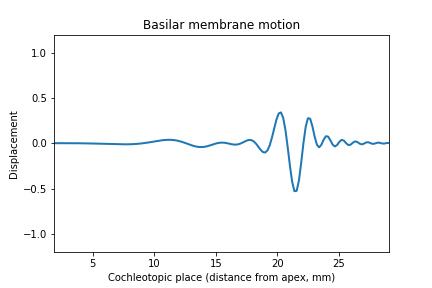
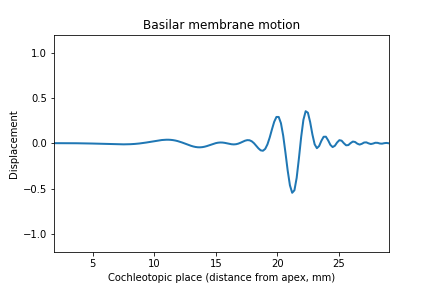
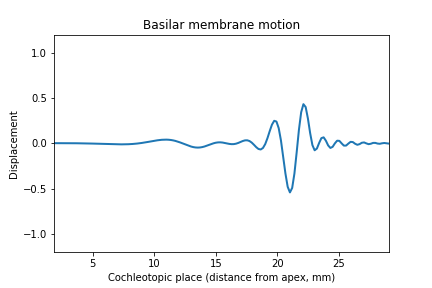
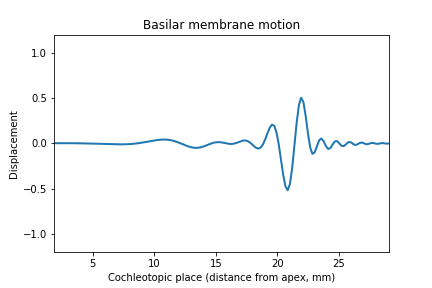
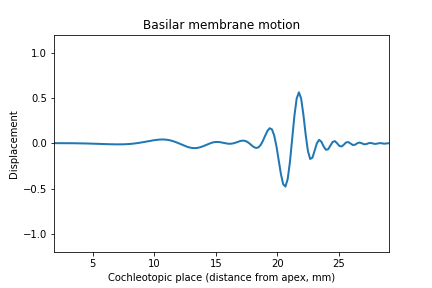
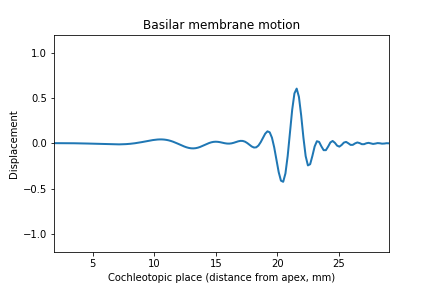
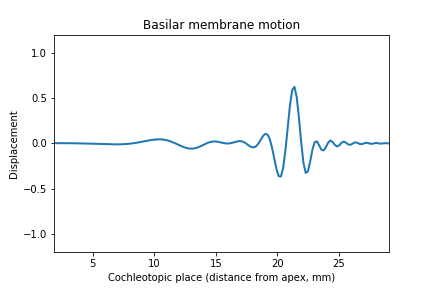
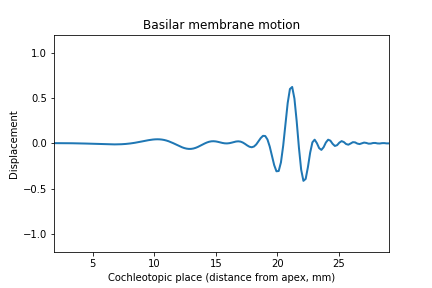
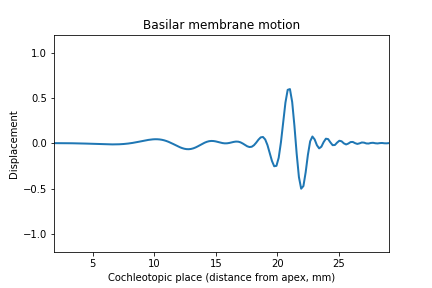
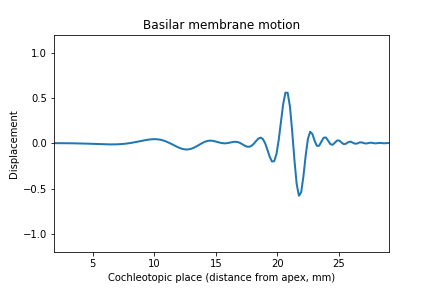
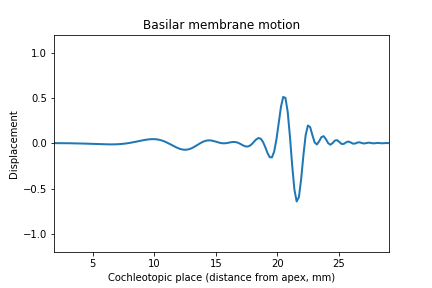
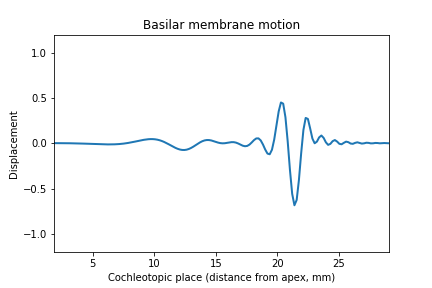
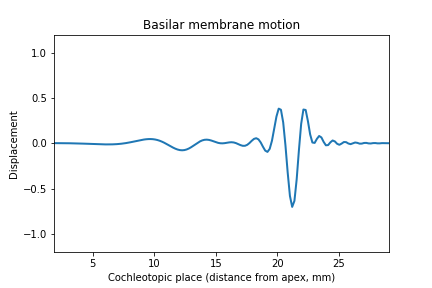
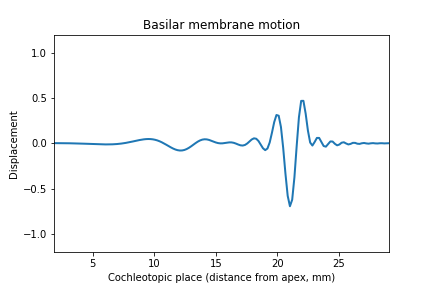
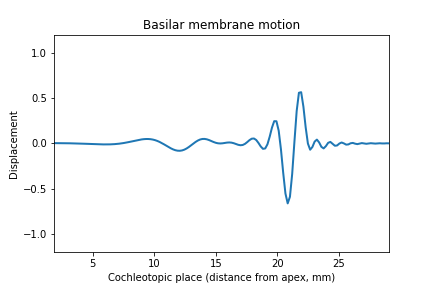
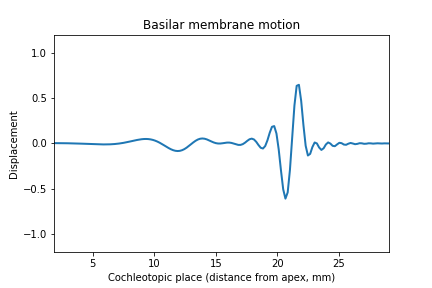
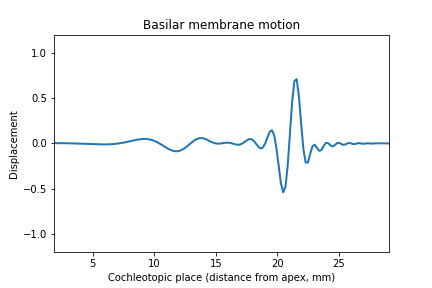
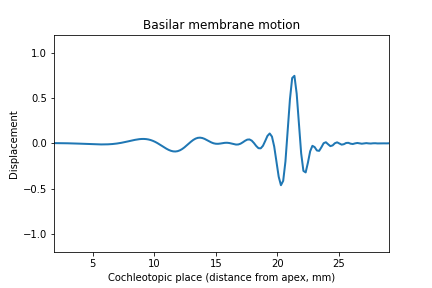
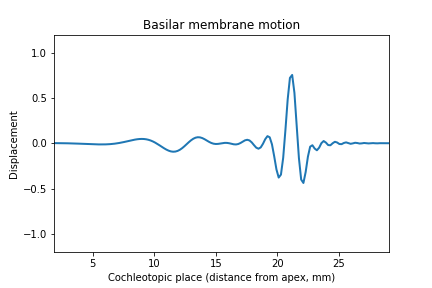
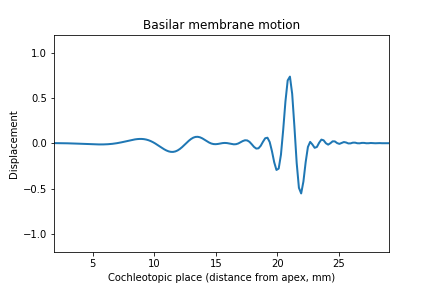
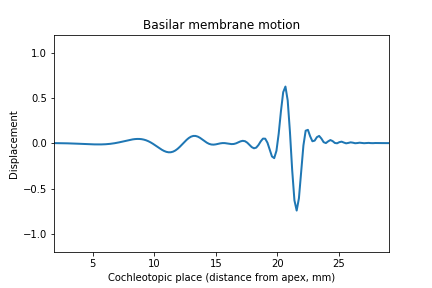
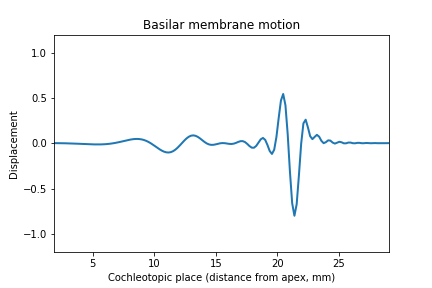
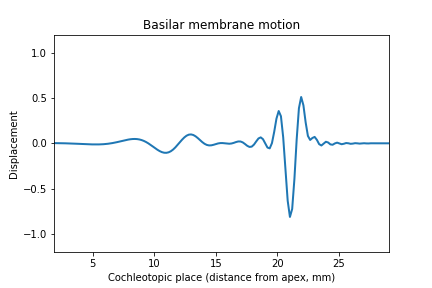
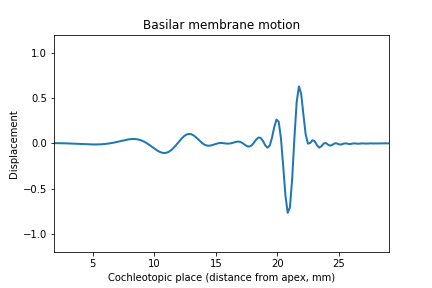
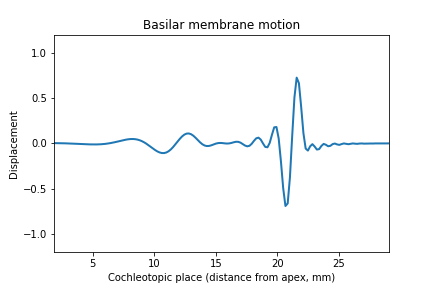
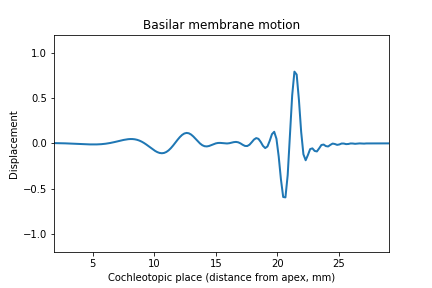
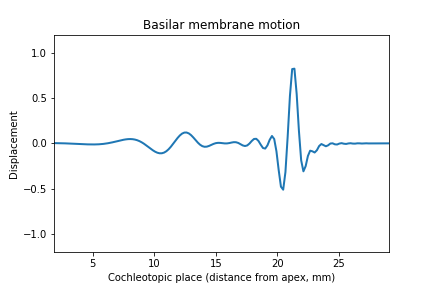
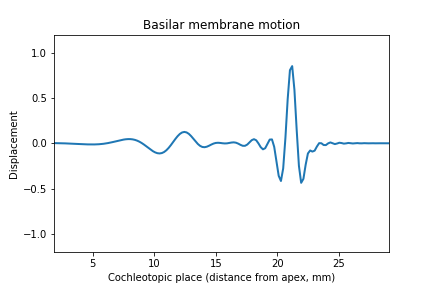
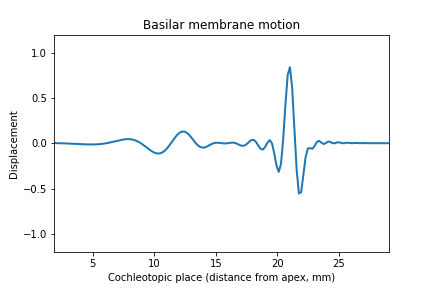
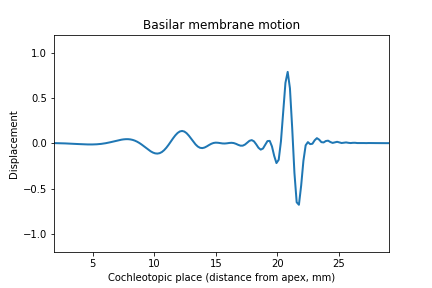
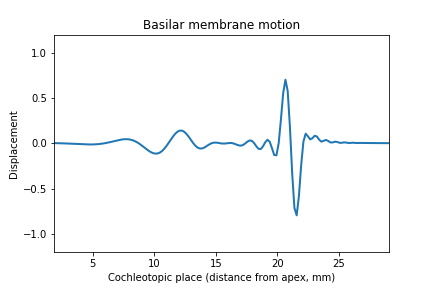
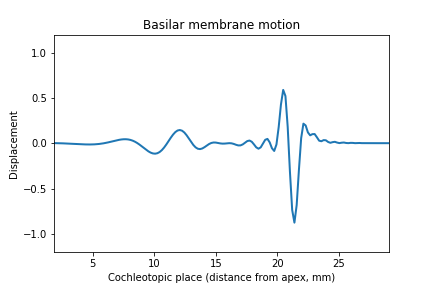
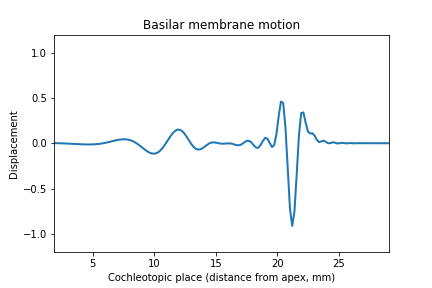
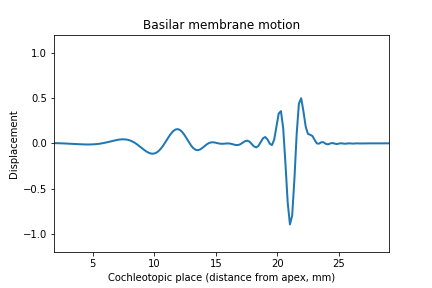
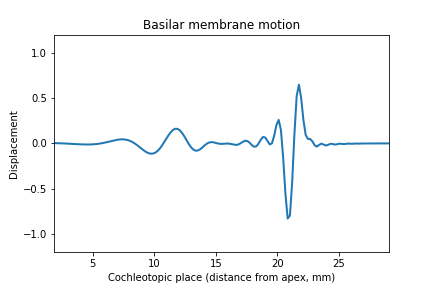
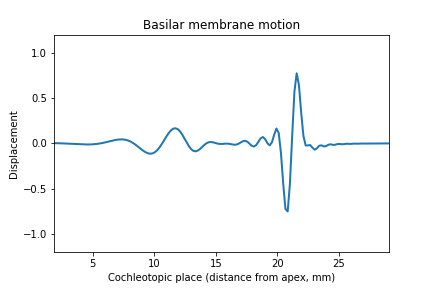
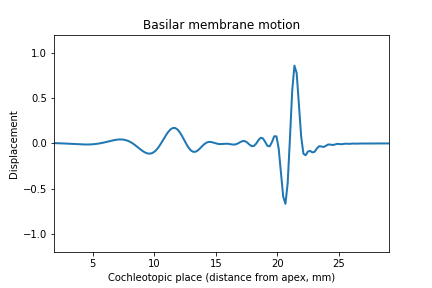
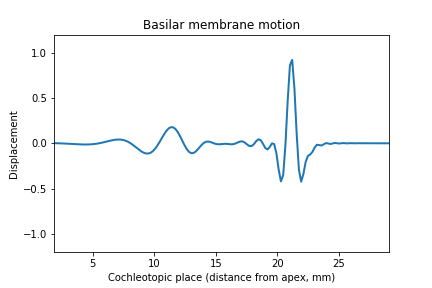
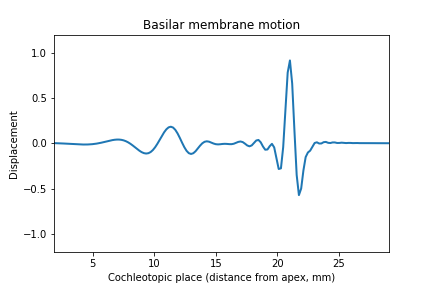
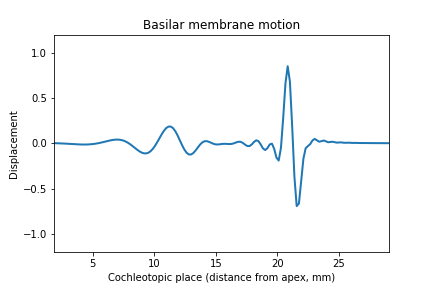
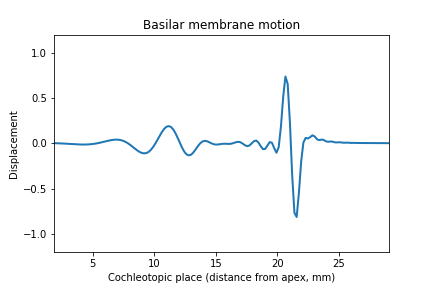
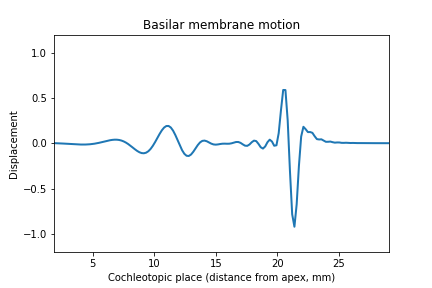
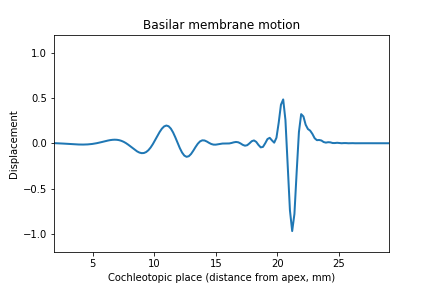
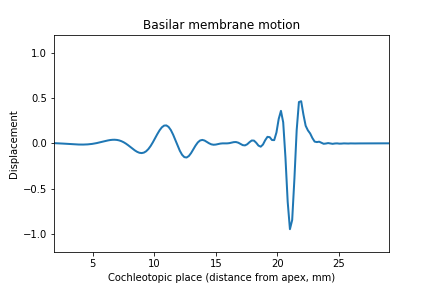
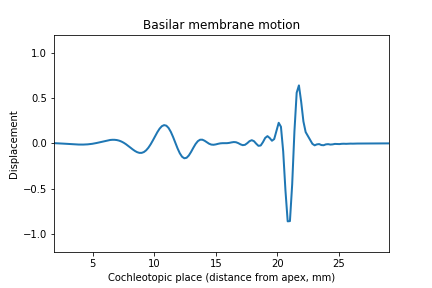
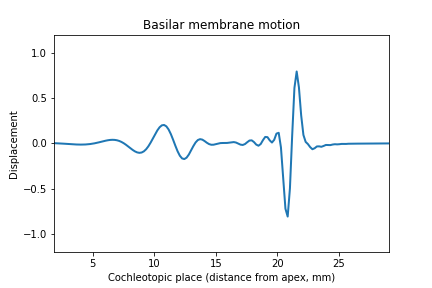
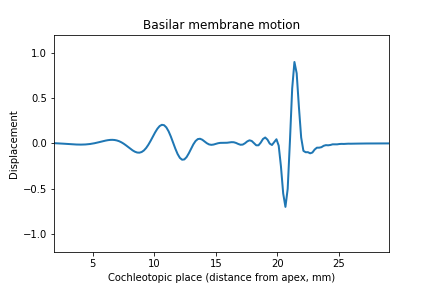
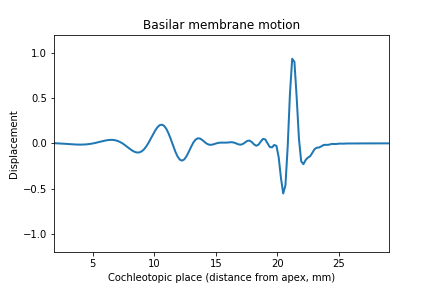
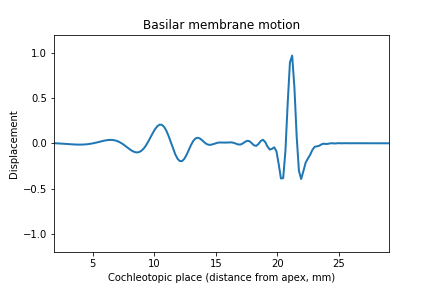
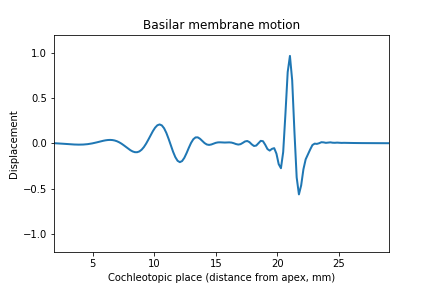
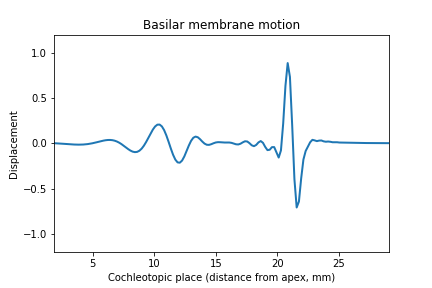
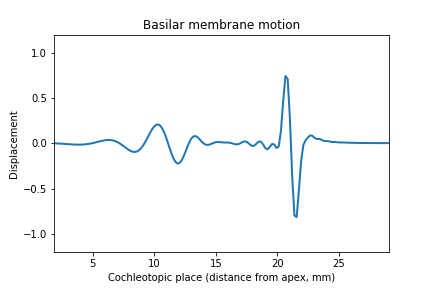
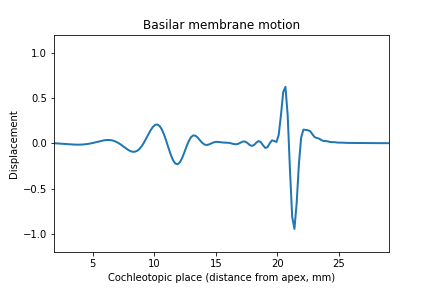
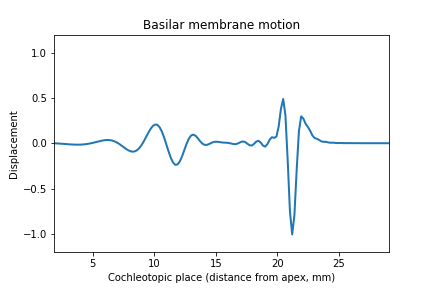
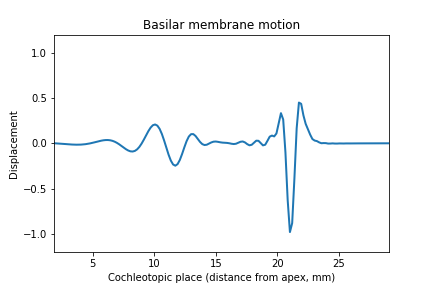
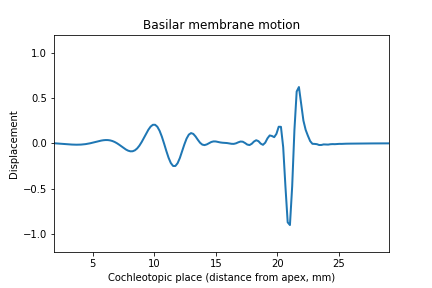
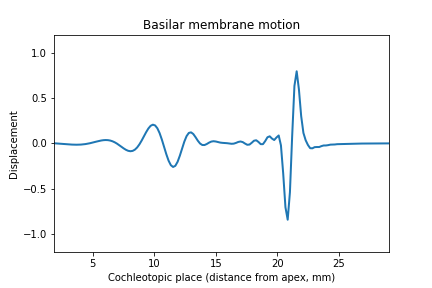
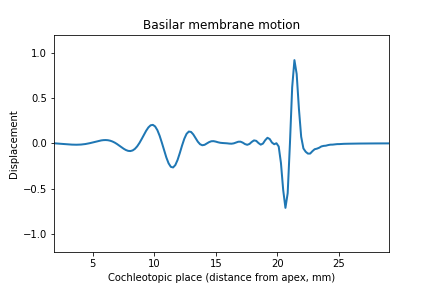
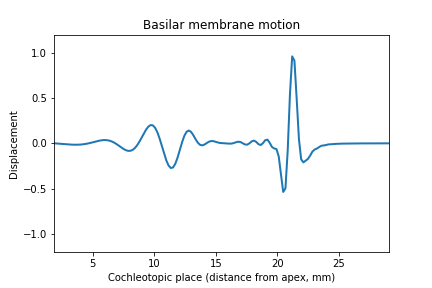
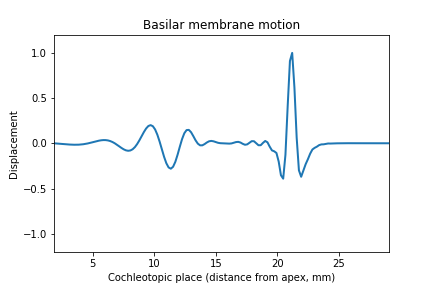
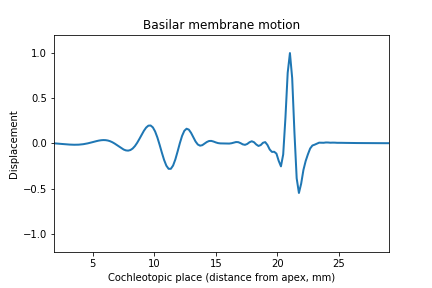
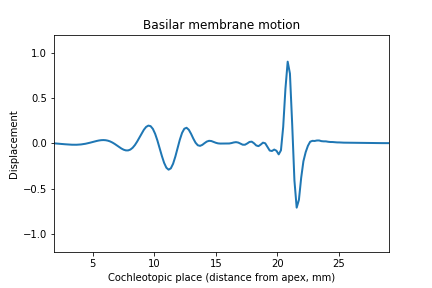
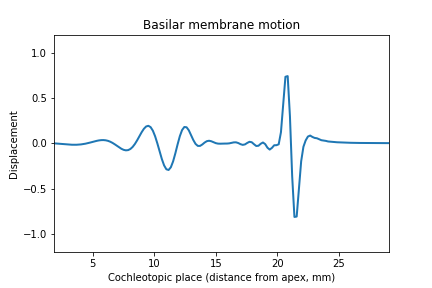
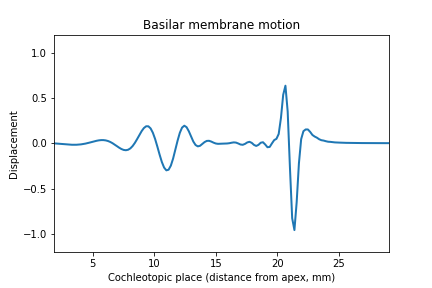
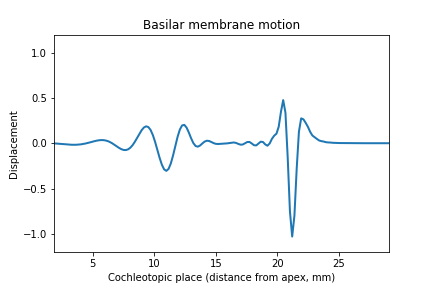
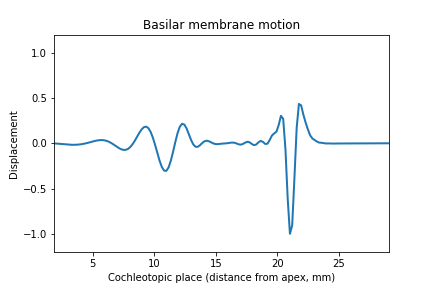
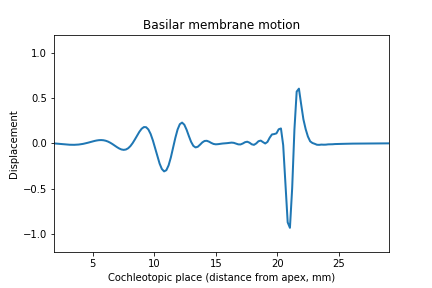
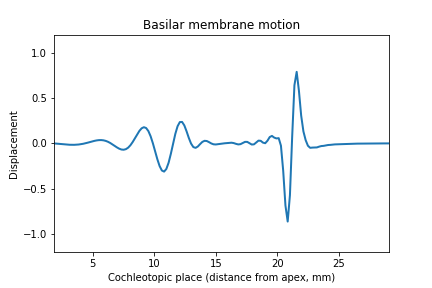
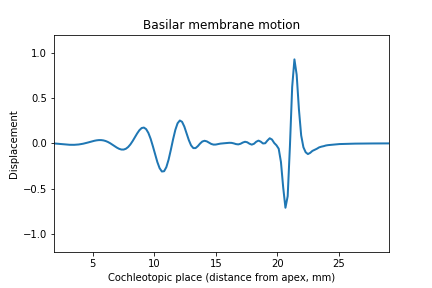
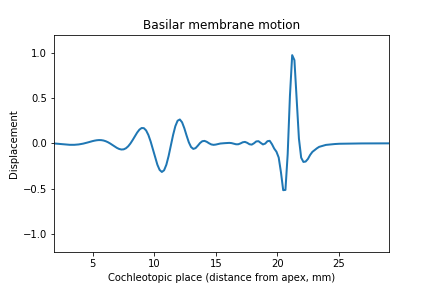
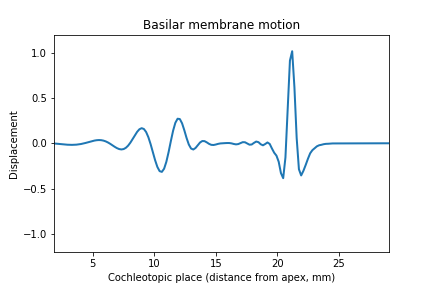
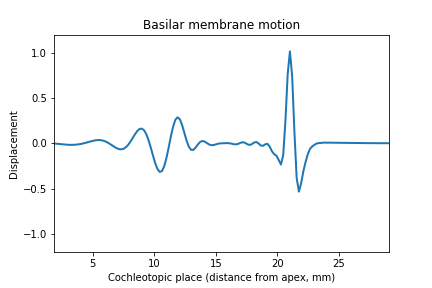
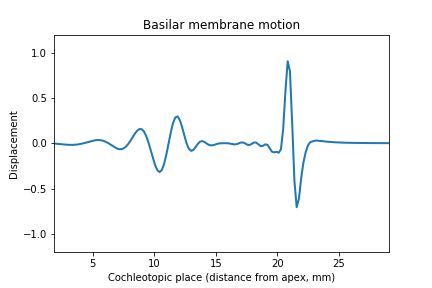
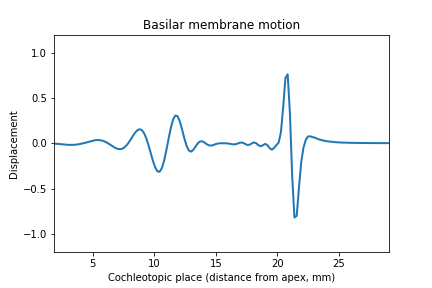
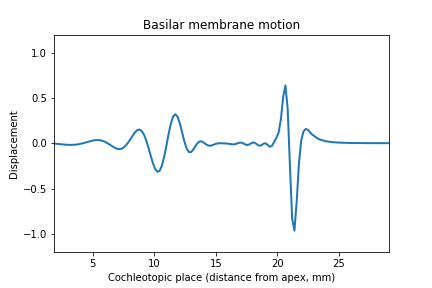
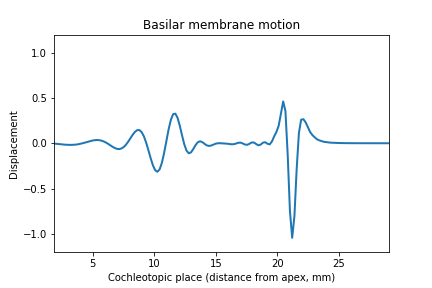
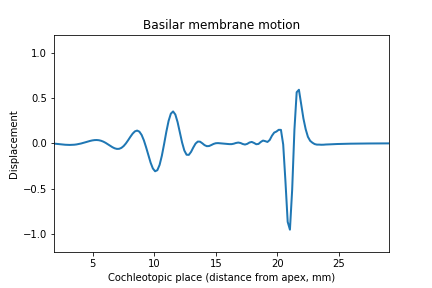
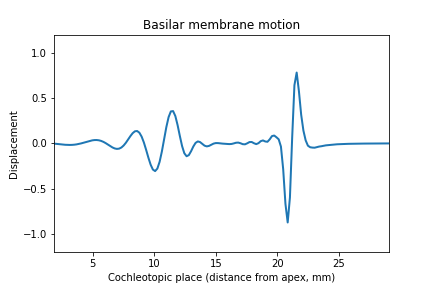
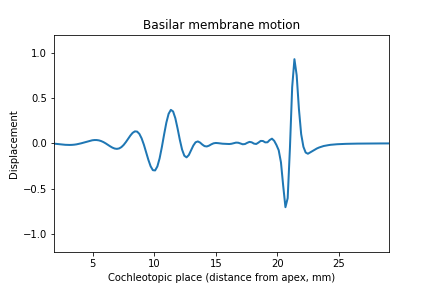
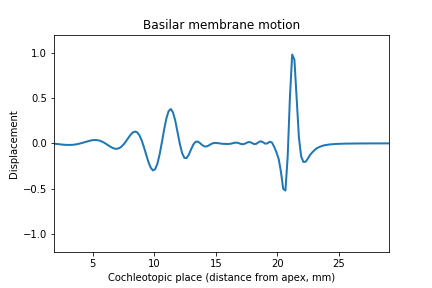
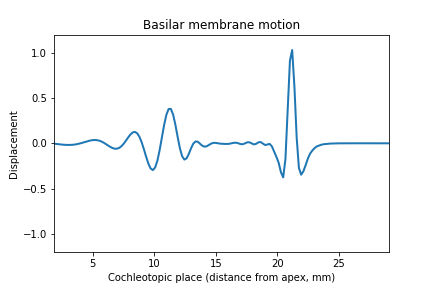
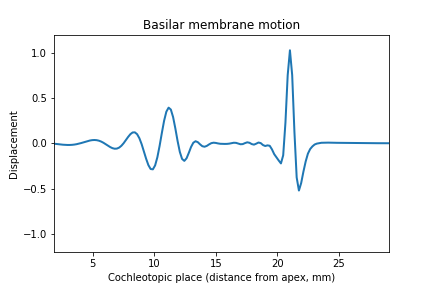
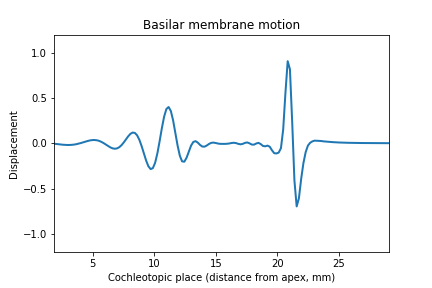
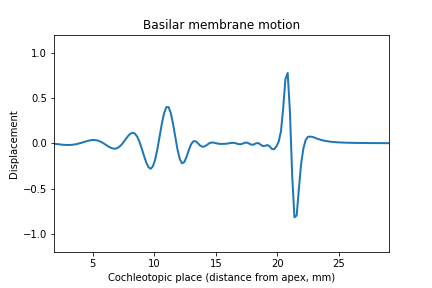
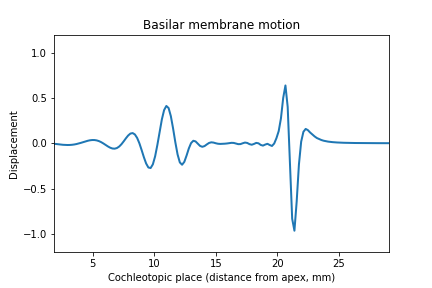
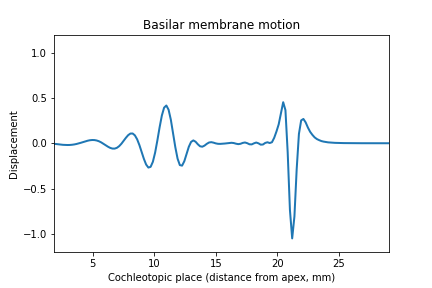
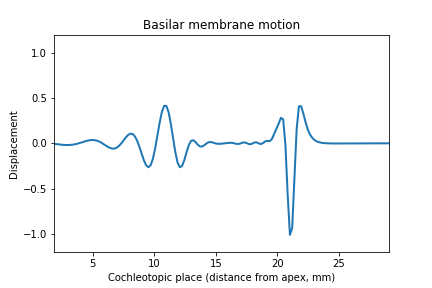
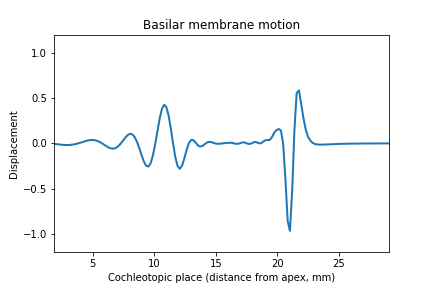
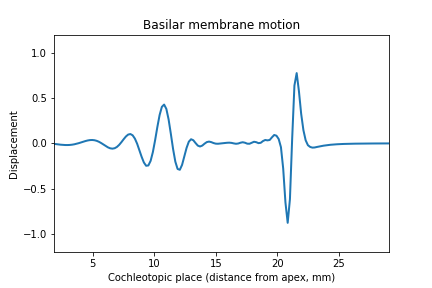
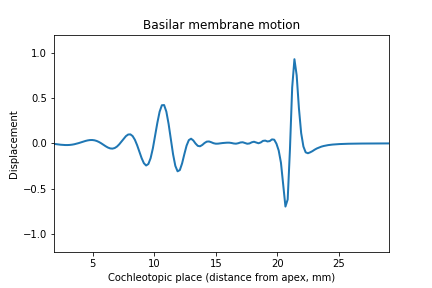
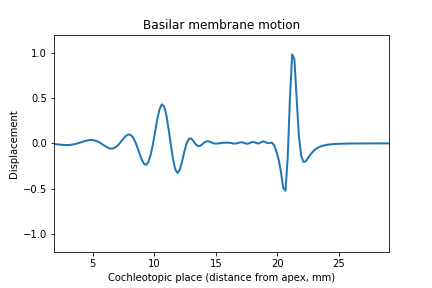
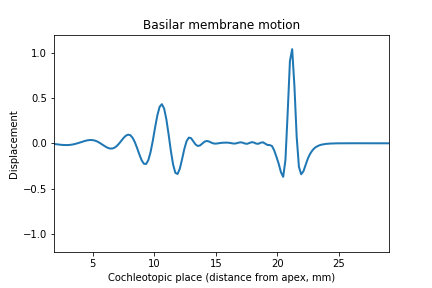
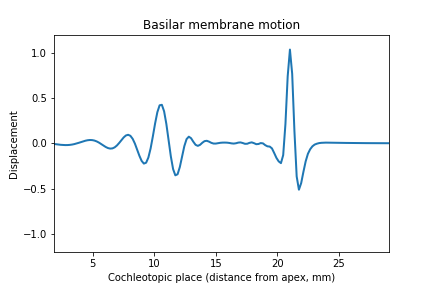
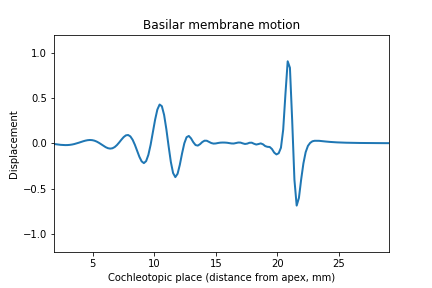
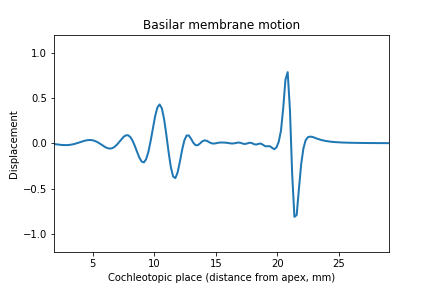

In [55]:
hi_tone = aud.tone(2000, duration=0.15)
lo_tone = aud.tone(500, duration=0.15)

cfs = aud.erbspace(50,5000,150)
stim = gts = aud.gammatone_bank(lo_tone+hi_tone, cfs=cfs)
n_chans, sig_len = gts.shape
xpts = aud.Hz2erb(cfs)
fig = plt.figure()
ax = plt.axes(xlim=(aud.Hz2erb(50), aud.Hz2erb(5000)), ylim=(-1.2, 1.2))
line, = ax.plot([], [], lw=2)
plt.title('Basilar membrane motion')
plt.ylabel('Displacement')
plt.xlabel('Cochleotopic place (distance from apex, mm)')

animation.FuncAnimation(fig, animate_BM, init_func=init_BM, frames=150, interval=50, blit=True)

## Exercise: Exploring the representation of pitch in the auditory periphery

> Using the tools you have seen so far (and any others you find in the auditory toolbox), examine different ways in which the percept of pitch might conceivably be encoded at the level of the basilar membrane's response to sound. 

> There are at least three possibilities (only one is required)! 

> Hints: Think about what kind of *artificial* stimulus you need to generate a pitch percept. If you get time, you can also use a real speech signal (see below)

Put your code right below, and before the Auditory Frequency resolution paragraph.

* aud.????? signals
* aud.gammatone
* aud.gammatone_bank
* aud.plot_sigs
----

In [56]:
cfs = aud.erbspace(50,5000,150)
f0 = 100
idx1 = np.min(np.argwhere(cfs>f0-20))
idx2 = np.max(np.argwhere(cfs<f0+20))
print("[{}, {}]".format(idx1, idx2 ))

[6, 11]


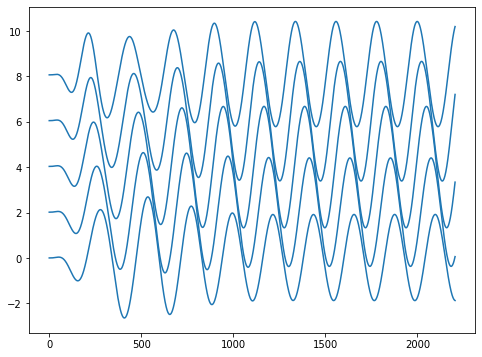

In [57]:
# PUT YOUR CODE HERE

signal = aud.formant(frequency=2200, bw=100, f0=100, duration=0.1)
stim = gts = aud.gammatone_bank(signal, cfs=cfs)
aud.plot_sigs(stim[idx1:idx2] ,gap=0.75);

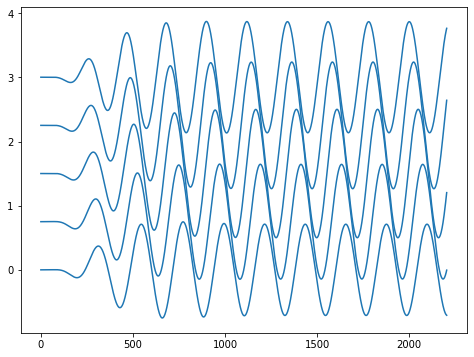

In [58]:
signal = aud.tone(100, duration=0.1)
stim = gts = aud.gammatone_bank(signal, cfs=cfs)
aud.plot_sigs(stim[idx1:idx2] ,gap=0.75);

### Comment (Raptakis, Marchioro)

We generated a formant signal with `aud.formant` with pitch $f_0 = 100$ Hz.
We processed it with a gammatone filterbank comprising $128$ ERB-spaced filters in the range $50 - 5000$ Hz, as suggested by the article.

We compared the output with the same gammatone filterbank applied to a tone of frequency $f_0$.

Then, we plotted the filters response in a range close to $f_0$, and we can see that the output is similar for the formant and the tone, as one would expect.

This means that the filters in that range are able to isolate the pitch information from the rest of the sound.

### Auditory frequency resolution


There are many consquences of the non-uniform frequency resolution in the cochlea. One way to appreciate these is to compare a traditional spectrogram of speech with an **auditory** spectrogram.

In [59]:
speech, fs = aud.read_wav('wiping') 

Let's plot the spectrogram for this speech signal.

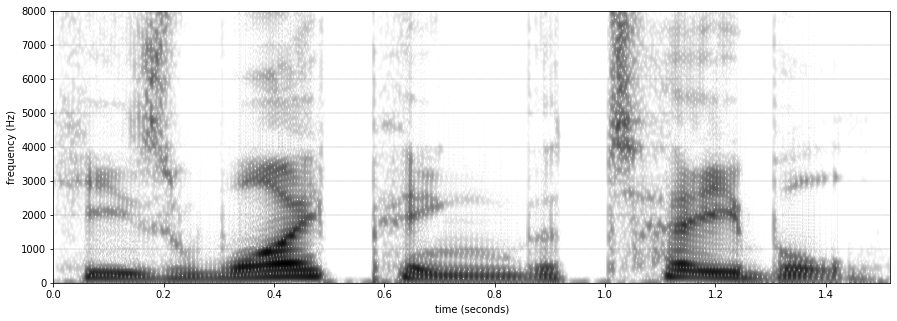

In [60]:
aud.spectrogram(speech);

...and also the rate map.

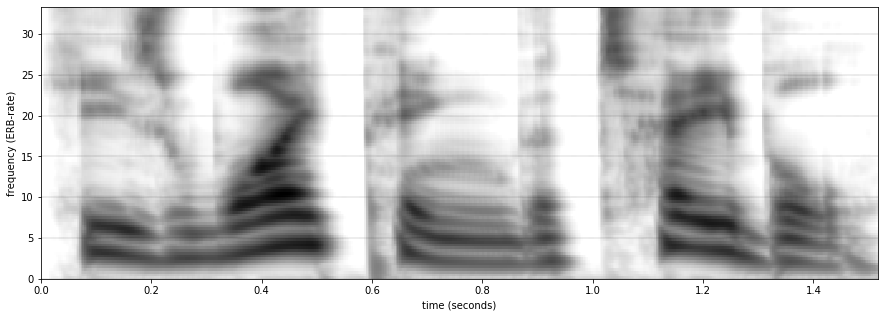

In [61]:
aud.ratemap(speech, n=100, frame_rate=0.003);

By comparing the two, we see numerous differences in the way the basilar membrane representation of the frequency axis -- both in terms of the warping of the linear scale, and its frequency resolution -- affects speech segments:

1. Consider the fricative /s/ in "he's" [0.2s]. The cutoff of the frication noise, the main cue to place of articulation, occurs at around 70% along the membrane, but the same cue in the traditional spectrogram occurs at 40% along the linear frequency scale.

2. The all-informative second formant (F2) dominates the central region of the auditory spectrogram yet occupies a narrower range in linear frequency.

3. The first formant (F1) is carried by resolved harmonics in the auditory spectrogram. At times when F2 is low in frequency, it too is resolved.

4. Information about voicing (a cue to the phoneme identity as well as a carrier of intonation) is distributed differently in the two spectrograms.

To clarify this last point, let's zoom in on a region.


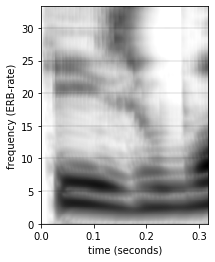

In [62]:
aud.ratemap(speech[1000:8000], n=250, frame_rate=0.001, dims=(3,4));

Note that F0 is represented very clearly by quasi-horizontal structure (resolved harmonics) in the lower half of the frequency range, and by quasi-vertical structure (amplitude modulations) in the upper half. In a moment we'll see where these modulations originate, but first, consider wideband and narrowband spectrograms.

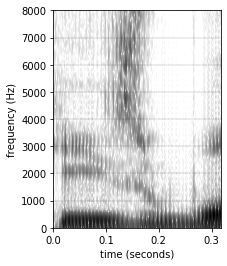

In [63]:
# first, a wideband spectrogram (frame size = 5 ms)
aud.spectrogram(speech[1000:8000], frame_size=0.005, dims=(3,4));

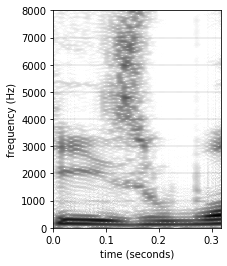

In [64]:
# INSERT CODE TO DISPLAY THE SAME PART OF THE SPECTRUM BUT IN NARROWBAND
aud.spectrogram(speech[1000:8000], frame_size=0.020, dims=(3,4));  # narrowband, frame size = 20 ms

Here, frequency resolution is increased, so we see individual harmonics, at the expense of temporal resolution (look at the burst near [0.025] seconds of the zoomed image). It should be clear to you that compared to the previous figure, the exact time location of the burst is not very clear.

### Amplitude modulation

Now let's see where the amplitude modulation (AM) comes from in the mid-high auditory frequency region. Use `aud.tones` function to create a sum of two tones, each of frequency 300 and 400 Hz, and duration of 0.1 s.


In [65]:
tones = aud.tone(frequency=[300, 400], duration=0.1) # INSERT CODE HERE

Let's listen.

In [66]:
Audio(tones, rate=22050)    # similar to a telephone dial tone

Let's visualize.

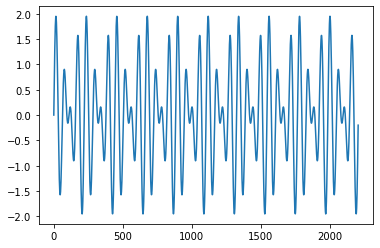

In [67]:
plt.plot(tones);

Now pass the `tones` through a gammatone filter with center frequency of 300 Hz

In [68]:
gt = aud.gammatone(tones, cf=300) # INSERT CODE HERE

Visualize.

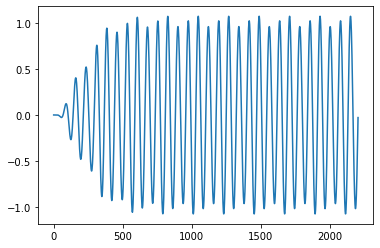

In [69]:
plt.plot(gt);

Let's see how it works through a gammatone filter bank of different central frequencies.

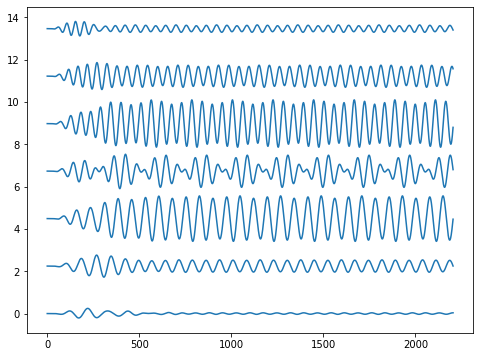

In [70]:
aud.plot_sigs(aud.gammatone_bank(tones, cfs=[200,250,300,350,400,450,500]), gap=2);

Use `aud.tones` function to create a sum of two tones, each of frequency 2300 and 2400 Hz, and duration of 0.1 s.

In [71]:
tones_hi = aud.tone(frequency=[2300, 2400], duration=0.1) # INSERT CODE HERE

Listen.

In [72]:
Audio(tones_hi, rate=22050)  

Write code to pass the signal through a gammatone filter bank with center frequencies from 2200 Hz up to 2500 Hz, with a step of 50 Hz.

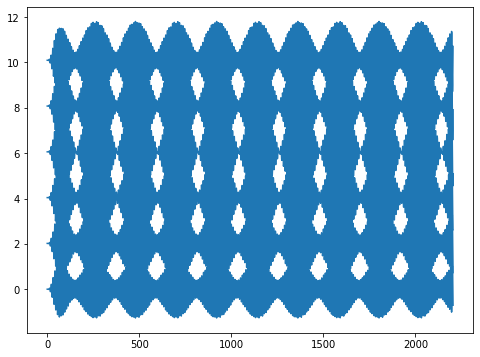

In [73]:
aud.plot_sigs(aud.gammatone_bank(tones_hi, cfs=np.arange(2200,2500,50))); # INSERT CODE HERE

Quite a difference!

* **Low frequencies**: the auditory filters are quite narrow, and mainly respond to one or other of the two frequency components (note that we can get some AM if we place the tones equidistant of the filter CF).

* **High frequencies**: the filters are much broader, meaning that a pair of tones at the same distance apart in frequency, are much more likely to interact and produce AM. We call these *unresolved harmonics*.

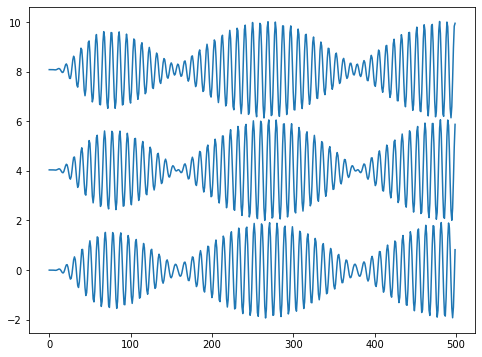

In [74]:
# Note that this is the case even for filters centred on the tones themselves
aud.plot_sigs(aud.gammatone_bank(tones_hi[0:500], cfs=[2300,2350,2400]), gap=2);

Just what determines whether we see resolved or unresolved harmonics for a source like speech? There is actually no simple answer. We cannot say that the region below, say 1 kHz, contains resolved harmonics, and the region above 1 kHz contains unresolved harmonics.

What might influence the appearance of resolved or unresolved harmonics?

To close this section, look at what happens at even higher frequencies.

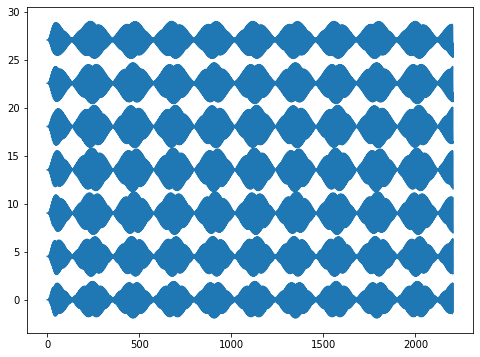

In [75]:
tones_higher = aud.tone(frequency=[4300, 4400], duration=0.1)
aud.plot_sigs(aud.gammatone_bank(tones_higher, cfs=[4200,4250,4300,4350,4400,4450,4500]), gap=2);

So far, so similar. But in reality we have more than 2 harmonics entering into each auditory filter.

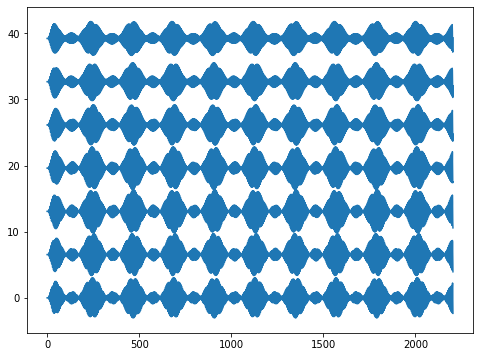

In [76]:
tones_higher = aud.tone(frequency=[4200, 4300, 4400], duration=0.1)
aud.plot_sigs(aud.gammatone_bank(tones_higher, cfs=[4200,4250,4300,4350,4400,4450,4500]), gap=2);

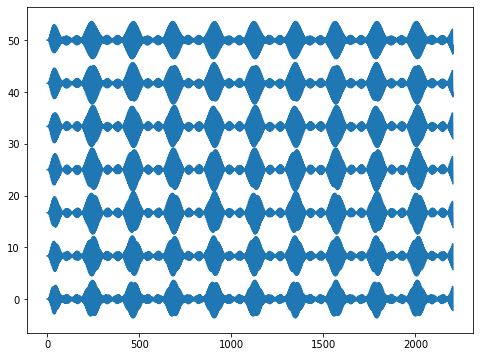

In [77]:
tones_higher = aud.tone(frequency=[4200, 4300, 4400, 4500], duration=0.1)
aud.plot_sigs(aud.gammatone_bank(tones_higher, cfs=[4200,4250,4300,4350,4400,4450,4500]), gap=2);

Although the modulation is more complex, the same fundamental frequency is dominating here, enabling *pitch* cues to be extracted by later stages of auditory processing (although the sensation is weaker). Try creating some harmonic series for yourself to experiment with the effects of auditory processing.

The simple way to look at things is to consider the wide band auditory filters as essentially passing most of their input signal. That means that the effect is to not modify the input very much. 

In [78]:
Audio(tones_hi, rate=22050)  

In [79]:
Audio(tones, rate=22050)  

Plotting...

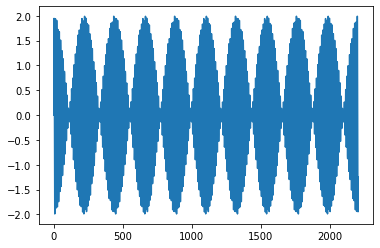

In [80]:
plt.plot(tones_hi);

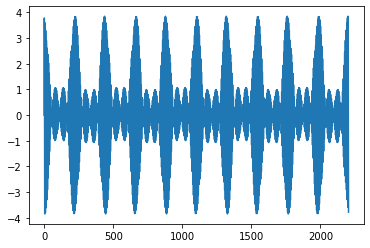

In [81]:
plt.plot(tones_higher);

Another way in which pitch is represented is in terms of repetitions in the fine-structure at a range of frequencies. This can be captured using autocorrelation in each frequency channel, then summed across frequencies to extract a compound measure known as a **summary autocorrelogram**.

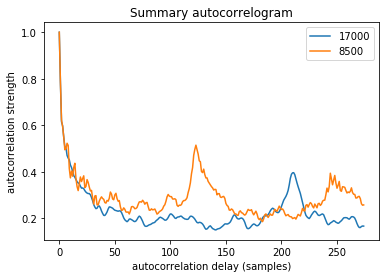

In [82]:
ac = aud.autocorrelogram(speech[16500:17500])
plt.plot(np.sum(ac, axis=0), label='17000')
ac = aud.autocorrelogram(speech[8000:9000])    # F0 higher at this point
plt.plot(np.sum(ac, axis=0), label='8500')
plt.title('Summary autocorrelogram')
plt.ylabel('autocorrelation strength')
plt.xlabel('autocorrelation delay (samples)')
plt.legend();